___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://machinelearningmastery.com/wp-content/uploads/2016/03/Compare-Machine-Learning-Algorithms.png" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2022
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___


### <font color= #2E9AFE> Tema: Comparación de modelos de regresión</font>

Una vez que aprendimos a crear los modelos de machine learning ¿qué hacemos con ellos?

Comparar varios modelos de machine learning para problemas de regresión es necesario para poder encontrar cuál de todos los modelos es el más eficiente y tiene los resultados más precisos. 

Hay muchos criterios para comparar los modelos. 

Recordando que si la **variable de respuesta es continua** entonces, este es un problema de **regresión** y tenemos que usar modelos de regresión para estimar los valores predichos. 

Como vimos, hay muchos modelos de regresión candidatos. Nuestra tarea es encontrar el que sirva a nuestro propósito.

Vamos a comparar los siguientes modelos:
- Regresión lineal múltiple
- Regresión LASSO
- Regresión Ridge
- Árbol de decisión
- Bosques Aleatorios
- SVR
- Redes Neuronales

Vamos a utilizar varias métricas para comparar los modelos.

### Métricas de Performance (Regresión)

**Error Absoluto Medio (Mean Absolute Error - MAE)**

Si $y$ es la variable de respuesta y $\hat{y}$ es la predicción, entonces el MAE es el error entre estos pares ($y$,$\hat{y}$) de variables y se calcula de la forma:

$$MAE = \frac{\sum_{i=1}^{n}|y_{i}-\hat{y}_{i}|}{n}$$

*¿Qué hace?*
- Mide el promedio del error absoluto entre los valores reales y las predicciones

*Ventajas*
- Es una métrica independiente de la escala, lo que significa que está en las mismas unidades de las variables originales. 
- Fácil de interpretar
- Es buena opción si no nos importan los valores atípicos

*Desventajas*
- Se les da la misma importancia (peso) a todos los errores
- Es insensible a valores atípicos



**Error Cuadrático Medio (Mean Square Error - MSE)**


$$MSE = \frac{\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^{2}}{n}$$

*¿Qué hace?*
El MSE calcula el promedio de los cuadrados del error entre los valores verdaderos y los valores estimados

*Ventajas*
- Función diferenciable
- El efecto de errores más grandes se vuelve más pronunciado que los errores más pequeños

*Desventajas*
- Tiene diferentes unidades que los valores reales


**Diferencia entre el MAE y el MSE**

La gran diferencia es cómo responden a errores más grandes. 

Depende mucho de la decisión del negocio y el costo asociado a los errores. 
     
 **R^2**
 
 $$R^{2}=1-\frac{SS_{res}}{SS_{Tot}}= \frac{\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^{2}}{\sum_{i=1}^{n}(y_{i}-\bar{y}_{i})^{2}}$$
 
 *¿Qué hace?*
- Explica la proporción de la varianza de la salida ("Y") que puede ser explicada por los predictores ("X")

*Desventajas*
- Siempre incrementa añadiendo más variables independientes (X), lo cual es una desventaja porque esas variables pueden no ser importantes para el modelo

*Ventajas*
- Es una métrica relativa que se usa para comparar varios modelos que fueron entrenados con los mismos datos

     
     
 

### Los Datos

Tenemos un dataset de personas que tienen un carro y lo quieren vender. Se tienen las siguientes variables:

- Age 
- Gender
- Miles: promedio de millas manejadas por día
- Debt
- Income
- Sales

Basados en esas variables, queremos predecir el valor potencial de venta de un carro, por lo que variable a predecir es "Sales". 

In [1]:
#Librerías

import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
import seaborn as sns 
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import SGD, Adam


In [2]:
#cargar datos
datos = pd.read_csv('carros.csv')
datos.head()

,age,gender,miles,debt,income,sales
0,28,0,23,0,4099,620
1,26,0,27,0,2677,1792
2,30,1,58,41576,6215,27754
3,26,1,25,43172,7626,28256
4,20,1,17,6979,8071,4438


In [3]:
#Revisamos si hay datos nulos
missing = pd.DataFrame(datos.isnull().sum(),columns=['Valores_Nulos'])
missing

,Valores_Nulos
age,0
gender,0
miles,0
debt,0
income,0
sales,0


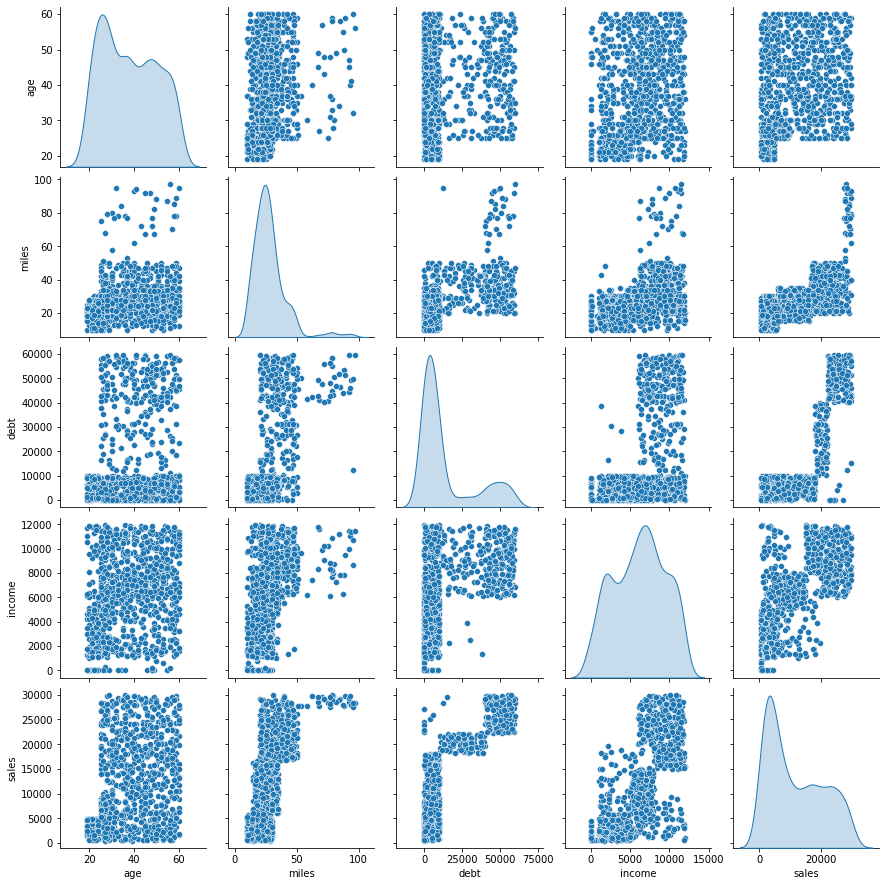

In [4]:
#Creamos gráficos básicos de los datos
sns.pairplot(datos[['age', 'miles', 'debt', 'income', 'sales']], diag_kind="kde")

In [5]:
#Calculando estadísticas básicas con los datos
datos_stats = datos.describe()
datos_stats = datos_stats.transpose()
datos_stats

,count,mean,std,min,25%,50%,75%,max
age,963.0,37.971963,12.290838,19.0,27.0,37.0,49.0,60.0
gender,963.0,0.512980,0.500091,0.0,0.0,1.0,1.0,1.0
miles,963.0,27.704050,13.378181,10.0,20.0,25.0,32.0,97.0
debt,963.0,14109.004154,18273.702481,0.0,1475.0,6236.0,16686.0,59770.0
income,963.0,6176.047767,3260.670142,0.0,3506.5,6360.0,8649.5,11970.0
sales,963.0,11689.860852,8986.896921,500.0,3554.0,9130.0,19245.0,29926.0


De las estadísticas anteriores podemos observar que algunas variables tienen grandes rangos y desviaciones, lo cual puede crear problemas durante el ajuste del modelo. Por lo tanto sería buena idea escalar los datos. 

### Train Test split

In [6]:
#separar la X y Y
X=datos.iloc[:,0:5]
y=datos.iloc[:,5]

#Dividimos los datos en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
#Estandarizar datos
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
y_train = preprocessing.scale(y_train)
X_test = preprocessing.scale(X_test)
y_test = preprocessing.scale(y_test)

**¿Porqué estandarizar los datos después del train test split?**

El escalamiento debe realizarse después de dividir los datos en entrenamiento y prueba, y se debe hacer sólo usando los datos de entrenamiento. 

Esto se debe a que los datos de prueba (test) tienen el papel de datos no vistos por el modelo, por lo que se supone que estos datos no están accesibles en la estapa del entrenamiento. 

Usar cualquier información proveniente de los datos de prueba antes o durante el entranamiento puede afectar al desempeño del modelo

#### Regresión Lineal 


In [8]:
#Inicializo objeto de regresión lineal
lin_reg = LinearRegression()
#Entrenar modelo
lin_reg.fit(X_train, y_train)
#Predecimos con datos de prueba
y_pred = lin_reg.predict(X_test)
#Métricas de performance
mae_lr = metrics.mean_absolute_error(y_test, y_pred)
mse_lr = metrics.mean_squared_error(y_test, y_pred)
r2_lr = metrics.r2_score(y_test, y_pred)

# Imprimir resultados
print('r2: ', r2_lr)
print('MAE: ', mae_lr)
print('MSE: ', mse_lr)
print('RMSE: ', np.sqrt(mae_lr))

r2:  0.8364108886819762
MAE:  0.3119007815345352
MSE:  0.1635891113180238
RMSE:  0.5584807799150614


#### Regresión Lineal con selección de variables

In [9]:
#Entrenar modelo
rfe = RFE(lin_reg, n_features_to_select = 4)
rfe = rfe.fit(X_train, y_train)

#Predecimos con datos de prueba
y_pred = rfe.predict(X_test)

#Métricas de performance
mae_rfe = metrics.mean_absolute_error(y_test, y_pred)
mse_rfe = metrics.mean_squared_error(y_test, y_pred)
r2_rfe = metrics.r2_score(y_test, y_pred)

# Imprimir resultados
print('r2: ', r2_rfe)
print('MAE: ', mae_rfe)
print('MSE: ', mse_rfe)
print('RMSE: ', np.sqrt(mae_rfe))

r2:  0.8367174006172184
MAE:  0.31150993315869785
MSE:  0.16328259938278156
RMSE:  0.5581307491607123


#### Regresión Lineal con regularización Ridge


In [10]:
#Inicializo modelo de ridge con alpha = 1
ridge = Ridge(alpha=1)
#Entrenar modelo
ridge.fit(X_train,y_train)
#Predecir con datos de prueba
ridge_pred = ridge.predict(X_test)

#Métricas de performance
mae_ridge = metrics.mean_absolute_error(y_test, ridge_pred)
mse_ridge=metrics.mean_squared_error(y_test, ridge_pred)
r2_ridge = r2_score(y_test, ridge_pred)

# Imprimir resultados
print('R2:  ',r2_ridge)
print('MAE: ', mae_ridge)
print('MSE: ', mse_ridge)
print('RMSE:', np.sqrt(mse_ridge))

R2:   0.8364172531254731
MAE:  0.3119341315613786
MSE:  0.16358274687452687
RMSE: 0.4044536399570745


#### Bosques Aleatorios

In [11]:
#Inicializamos el bosque con 300 árboles
rf_regressor = RandomForestRegressor(n_estimators = 300 ,  random_state = 0)
rf_regressor.fit(X_train,y_train)

#Predecir el precio de venta  
y_pred = rf_regressor.predict(X_test)

#Calcular métricas
mae_rf=metrics.mean_absolute_error(y_test, y_pred)
mse_rf=metrics.mean_squared_error(y_test, y_pred)
r2_rf=metrics.r2_score(y_test, y_pred)

#Imprimir métricas
print('R2 square:',r2_rf)
print('MAE: ', mae_rf)
print('MSE: ', mse_rf)

R2 square: 0.9084579202821852
MAE:  0.21442115274283988
MSE:  0.09154207971781475


#### Máquina de Soporte Vectorial para Regresión (SVR)

In [12]:
#Inicializar objeto
regressor= SVR(kernel='rbf')
#Entrenar modelo
regressor.fit(X_train,y_train)
#Predecir
y_pred_svm=regressor.predict(X_test)

#Calcular métricas
mae_svr=metrics.mean_absolute_error(y_test, y_pred_svm)
mse_svr=metrics.mean_squared_error(y_test, y_pred_svm)
r2_svr=metrics.r2_score(y_test, y_pred_svm)

# Imprimir Métricas
print('R2 square:',r2_svr)
print('MAE: ', mae_svr)
print('MSE: ', mse_svr)

R2 square: 0.8939968531978244
MAE:  0.2368613686845289
MSE:  0.10600314680217561


#### Red Neuronal

In [13]:
import tensorflow

In [14]:
#Hiperparámetros iniciales
epochs = 1000
learning_rate = 0.1
decay_rate = learning_rate/epochs
momentum = 0.8

# Crear arquitectura de la red neuronal
model = Sequential()
#5 variables de entrada, por lo tanto input_dim=5
model.add(Dense(12,activation='relu',input_dim=5))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='linear'))

# Configuración del optimizador
#gradiente descendente
opt = tensorflow.keras.optimizers.SGD(lr=learning_rate,momentum=momentum,
                           decay=decay_rate,nesterov=True)
#opt = keras.optimizers.Adam(lr=0.09)
model.compile(loss = 'mean_squared_error',
              optimizer=opt,
              metrics=['mae','mse'])

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [15]:
#Ajustar modelo
history = model.fit(X_train,y_train,
                    epochs=epochs,
                    batch_size=200,
                    validation_data=(X_test,y_test))

Epoch 1/1000
4/4 [==============================] - 1s 77ms/step - loss: 0.7614 - mae: 0.7214 - mse: 0.7614 - val_loss: 0.2781 - val_mae: 0.4300 - val_mse: 0.2781
Epoch 2/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.2648 - mae: 0.4218 - mse: 0.2648 - val_loss: 0.2112 - val_mae: 0.3784 - val_mse: 0.2112
Epoch 3/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.1930 - mae: 0.3479 - mse: 0.1930 - val_loss: 0.1466 - val_mae: 0.3086 - val_mse: 0.1466
Epoch 4/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.1608 - mae: 0.3086 - mse: 0.1608 - val_loss: 0.1255 - val_mae: 0.2713 - val_mse: 0.1255
Epoch 5/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.1518 - mae: 0.2904 - mse: 0.1518 - val_loss: 0.1217 - val_mae: 0.2700 - val_mse: 0.1217
Epoch 6/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.1511 - mae: 0.2931 - mse: 0.1511 - val_loss: 0.1267 - val_mae: 0.2657 - val_mse: 0.1267
Epoch 7/1000
4/4 [====

4/4 [==============================] - 0s 22ms/step - loss: 0.1222 - mae: 0.2539 - mse: 0.1222 - val_loss: 0.1069 - val_mae: 0.2376 - val_mse: 0.1069
Epoch 52/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1242 - mae: 0.2545 - mse: 0.1242 - val_loss: 0.1528 - val_mae: 0.2982 - val_mse: 0.1528
Epoch 53/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.1322 - mae: 0.2681 - mse: 0.1322 - val_loss: 0.1063 - val_mae: 0.2475 - val_mse: 0.1063
Epoch 54/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1254 - mae: 0.2611 - mse: 0.1254 - val_loss: 0.1084 - val_mae: 0.2371 - val_mse: 0.1084
Epoch 55/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.1250 - mae: 0.2544 - mse: 0.1250 - val_loss: 0.1063 - val_mae: 0.2361 - val_mse: 0.1063
Epoch 56/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1270 - mae: 0.2634 - mse: 0.1270 - val_loss: 0.1350 - val_mae: 0.2963 - val_mse: 0.1350
Epoch 57/1000
4/4 [===========

4/4 [==============================] - 0s 18ms/step - loss: 0.1203 - mae: 0.2542 - mse: 0.1203 - val_loss: 0.1235 - val_mae: 0.2811 - val_mse: 0.1235
Epoch 102/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.1224 - mae: 0.2601 - mse: 0.1224 - val_loss: 0.1086 - val_mae: 0.2565 - val_mse: 0.1086
Epoch 103/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1191 - mae: 0.2518 - mse: 0.1191 - val_loss: 0.1059 - val_mae: 0.2493 - val_mse: 0.1059
Epoch 104/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.1134 - mae: 0.2426 - mse: 0.1134 - val_loss: 0.1232 - val_mae: 0.2811 - val_mse: 0.1232
Epoch 105/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1290 - mae: 0.2708 - mse: 0.1290 - val_loss: 0.1097 - val_mae: 0.2375 - val_mse: 0.1097
Epoch 106/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1254 - mae: 0.2580 - mse: 0.1254 - val_loss: 0.1120 - val_mae: 0.2399 - val_mse: 0.1120
Epoch 107/1000
4/4 [=====

Epoch 151/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.1137 - mae: 0.2447 - mse: 0.1137 - val_loss: 0.1122 - val_mae: 0.2429 - val_mse: 0.1122
Epoch 152/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1089 - mae: 0.2360 - mse: 0.1089 - val_loss: 0.1186 - val_mae: 0.2525 - val_mse: 0.1186
Epoch 153/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1254 - mae: 0.2621 - mse: 0.1254 - val_loss: 0.1196 - val_mae: 0.2505 - val_mse: 0.1196
Epoch 154/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.1115 - mae: 0.2432 - mse: 0.1115 - val_loss: 0.1181 - val_mae: 0.2694 - val_mse: 0.1181
Epoch 155/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.1149 - mae: 0.2490 - mse: 0.1149 - val_loss: 0.1084 - val_mae: 0.2408 - val_mse: 0.1084
Epoch 156/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1090 - mae: 0.2376 - mse: 0.1090 - val_loss: 0.1112 - val_mae: 0.2421 - val_mse: 0.1112
Epoch 157/10

Epoch 201/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1063 - mae: 0.2331 - mse: 0.1063 - val_loss: 0.1110 - val_mae: 0.2421 - val_mse: 0.1110
Epoch 202/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1151 - mae: 0.2468 - mse: 0.1151 - val_loss: 0.1053 - val_mae: 0.2370 - val_mse: 0.1053
Epoch 203/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.1032 - mae: 0.2280 - mse: 0.1032 - val_loss: 0.1126 - val_mae: 0.2567 - val_mse: 0.1126
Epoch 204/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1072 - mae: 0.2347 - mse: 0.1072 - val_loss: 0.1124 - val_mae: 0.2571 - val_mse: 0.1124
Epoch 205/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.1076 - mae: 0.2392 - mse: 0.1076 - val_loss: 0.1174 - val_mae: 0.2468 - val_mse: 0.1174
Epoch 206/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1091 - mae: 0.2377 - mse: 0.1091 - val_loss: 0.1022 - val_mae: 0.2320 - val_mse: 0.1022
Epoch 207/

Epoch 251/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1018 - mae: 0.2291 - mse: 0.1018 - val_loss: 0.1038 - val_mae: 0.2333 - val_mse: 0.1038
Epoch 252/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.1074 - mae: 0.2352 - mse: 0.1074 - val_loss: 0.1192 - val_mae: 0.2516 - val_mse: 0.1192
Epoch 253/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1013 - mae: 0.2283 - mse: 0.1013 - val_loss: 0.1041 - val_mae: 0.2473 - val_mse: 0.1041
Epoch 254/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1077 - mae: 0.2387 - mse: 0.1077 - val_loss: 0.1114 - val_mae: 0.2429 - val_mse: 0.1114
Epoch 255/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1021 - mae: 0.2277 - mse: 0.1021 - val_loss: 0.1035 - val_mae: 0.2369 - val_mse: 0.1035
Epoch 256/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.1003 - mae: 0.2280 - mse: 0.1003 - val_loss: 0.1044 - val_mae: 0.2477 - val_mse: 0.1044
Epoch 257/

Epoch 301/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1011 - mae: 0.2265 - mse: 0.1011 - val_loss: 0.1027 - val_mae: 0.2388 - val_mse: 0.1027
Epoch 302/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0981 - mae: 0.2250 - mse: 0.0981 - val_loss: 0.1067 - val_mae: 0.2395 - val_mse: 0.1067
Epoch 303/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1033 - mae: 0.2345 - mse: 0.1033 - val_loss: 0.1056 - val_mae: 0.2467 - val_mse: 0.1056
Epoch 304/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0996 - mae: 0.2241 - mse: 0.0996 - val_loss: 0.1095 - val_mae: 0.2398 - val_mse: 0.1095
Epoch 305/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0975 - mae: 0.2237 - mse: 0.0975 - val_loss: 0.1024 - val_mae: 0.2354 - val_mse: 0.1024
Epoch 306/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0994 - mae: 0.2258 - mse: 0.0994 - val_loss: 0.1028 - val_mae: 0.2340 - val_mse: 0.1028
Epoch 307/1

Epoch 351/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0994 - mae: 0.2257 - mse: 0.0994 - val_loss: 0.1141 - val_mae: 0.2474 - val_mse: 0.1141
Epoch 352/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1015 - mae: 0.2295 - mse: 0.1015 - val_loss: 0.1143 - val_mae: 0.2638 - val_mse: 0.1143
Epoch 353/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0985 - mae: 0.2297 - mse: 0.0985 - val_loss: 0.1281 - val_mae: 0.2597 - val_mse: 0.1281
Epoch 354/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1008 - mae: 0.2330 - mse: 0.1008 - val_loss: 0.1133 - val_mae: 0.2457 - val_mse: 0.1133
Epoch 355/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0985 - mae: 0.2271 - mse: 0.0985 - val_loss: 0.1109 - val_mae: 0.2453 - val_mse: 0.1109
Epoch 356/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1002 - mae: 0.2285 - mse: 0.1002 - val_loss: 0.1042 - val_mae: 0.2462 - val_mse: 0.1042
Epoch 357/1000
4

Epoch 401/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.1007 - mae: 0.2268 - mse: 0.1007 - val_loss: 0.1329 - val_mae: 0.2949 - val_mse: 0.1329
Epoch 402/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.1027 - mae: 0.2389 - mse: 0.1027 - val_loss: 0.1230 - val_mae: 0.2815 - val_mse: 0.1230
Epoch 403/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.1112 - mae: 0.2498 - mse: 0.1112 - val_loss: 0.1182 - val_mae: 0.2538 - val_mse: 0.1182
Epoch 404/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0993 - mae: 0.2286 - mse: 0.0993 - val_loss: 0.1037 - val_mae: 0.2374 - val_mse: 0.1037
Epoch 405/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0987 - mae: 0.2244 - mse: 0.0987 - val_loss: 0.1084 - val_mae: 0.2429 - val_mse: 0.1084
Epoch 406/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0983 - mae: 0.2231 - mse: 0.0983 - val_loss: 0.1053 - val_mae: 0.2420 - val_mse: 0.1053
Epoch 407/100

Epoch 451/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.1033 - mae: 0.2371 - mse: 0.1033 - val_loss: 0.1215 - val_mae: 0.2766 - val_mse: 0.1215
Epoch 452/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1032 - mae: 0.2361 - mse: 0.1032 - val_loss: 0.1198 - val_mae: 0.2545 - val_mse: 0.1198
Epoch 453/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.1012 - mae: 0.2300 - mse: 0.1012 - val_loss: 0.1158 - val_mae: 0.2639 - val_mse: 0.1158
Epoch 454/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1008 - mae: 0.2330 - mse: 0.1008 - val_loss: 0.1135 - val_mae: 0.2513 - val_mse: 0.1135
Epoch 455/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0965 - mae: 0.2232 - mse: 0.0965 - val_loss: 0.1128 - val_mae: 0.2530 - val_mse: 0.1128
Epoch 456/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0977 - mae: 0.2264 - mse: 0.0977 - val_loss: 0.1356 - val_mae: 0.2729 - val_mse: 0.1356
Epoch 457/1

Epoch 501/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1094 - mae: 0.2383 - mse: 0.1094 - val_loss: 0.1245 - val_mae: 0.2624 - val_mse: 0.1245
Epoch 502/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1054 - mae: 0.2338 - mse: 0.1054 - val_loss: 0.1110 - val_mae: 0.2582 - val_mse: 0.1110
Epoch 503/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.0967 - mae: 0.2240 - mse: 0.0967 - val_loss: 0.1047 - val_mae: 0.2474 - val_mse: 0.1047
Epoch 504/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0953 - mae: 0.2219 - mse: 0.0953 - val_loss: 0.1065 - val_mae: 0.2450 - val_mse: 0.1065
Epoch 505/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0954 - mae: 0.2225 - mse: 0.0954 - val_loss: 0.1216 - val_mae: 0.2536 - val_mse: 0.1216
Epoch 506/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1030 - mae: 0.2407 - mse: 0.1030 - val_loss: 0.1049 - val_mae: 0.2463 - val_mse: 0.1049
Epoch 507/

Epoch 551/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0955 - mae: 0.2209 - mse: 0.0955 - val_loss: 0.1071 - val_mae: 0.2422 - val_mse: 0.1071
Epoch 552/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0945 - mae: 0.2198 - mse: 0.0945 - val_loss: 0.1171 - val_mae: 0.2694 - val_mse: 0.1171
Epoch 553/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0985 - mae: 0.2308 - mse: 0.0985 - val_loss: 0.1031 - val_mae: 0.2414 - val_mse: 0.1031
Epoch 554/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0967 - mae: 0.2226 - mse: 0.0967 - val_loss: 0.1199 - val_mae: 0.2551 - val_mse: 0.1199
Epoch 555/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.1012 - mae: 0.2291 - mse: 0.1012 - val_loss: 0.1145 - val_mae: 0.2545 - val_mse: 0.1145
Epoch 556/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0996 - mae: 0.2285 - mse: 0.0996 - val_loss: 0.1149 - val_mae: 0.2628 - val_mse: 0.1149
Epoch 557/1000

Epoch 601/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0955 - mae: 0.2203 - mse: 0.0955 - val_loss: 0.1074 - val_mae: 0.2479 - val_mse: 0.1074
Epoch 602/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0956 - mae: 0.2248 - mse: 0.0956 - val_loss: 0.1089 - val_mae: 0.2484 - val_mse: 0.1089
Epoch 603/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0964 - mae: 0.2233 - mse: 0.0964 - val_loss: 0.1111 - val_mae: 0.2570 - val_mse: 0.1111
Epoch 604/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0953 - mae: 0.2224 - mse: 0.0953 - val_loss: 0.1094 - val_mae: 0.2473 - val_mse: 0.1094
Epoch 605/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0937 - mae: 0.2166 - mse: 0.0937 - val_loss: 0.1109 - val_mae: 0.2589 - val_mse: 0.1109
Epoch 606/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0945 - mae: 0.2188 - mse: 0.0945 - val_loss: 0.1321 - val_mae: 0.2941 - val_mse: 0.1321
Epoch 607/1

Epoch 651/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.0947 - mae: 0.2194 - mse: 0.0947 - val_loss: 0.1169 - val_mae: 0.2719 - val_mse: 0.1169
Epoch 652/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1023 - mae: 0.2337 - mse: 0.1023 - val_loss: 0.1101 - val_mae: 0.2605 - val_mse: 0.1101
Epoch 653/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0951 - mae: 0.2241 - mse: 0.0951 - val_loss: 0.1062 - val_mae: 0.2439 - val_mse: 0.1062
Epoch 654/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0950 - mae: 0.2215 - mse: 0.0950 - val_loss: 0.1128 - val_mae: 0.2652 - val_mse: 0.1128
Epoch 655/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0991 - mae: 0.2284 - mse: 0.0991 - val_loss: 0.1225 - val_mae: 0.2811 - val_mse: 0.1225
Epoch 656/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0996 - mae: 0.2340 - mse: 0.0996 - val_loss: 0.1078 - val_mae: 0.2502 - val_mse: 0.1078
Epoch 657/

Epoch 701/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0935 - mae: 0.2190 - mse: 0.0935 - val_loss: 0.1112 - val_mae: 0.2476 - val_mse: 0.1112
Epoch 702/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0994 - mae: 0.2263 - mse: 0.0994 - val_loss: 0.1266 - val_mae: 0.2617 - val_mse: 0.1266
Epoch 703/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0970 - mae: 0.2221 - mse: 0.0970 - val_loss: 0.1234 - val_mae: 0.2599 - val_mse: 0.1234
Epoch 704/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.1010 - mae: 0.2280 - mse: 0.1010 - val_loss: 0.1393 - val_mae: 0.3024 - val_mse: 0.1393
Epoch 705/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.1201 - mae: 0.2619 - mse: 0.1201 - val_loss: 0.1122 - val_mae: 0.2510 - val_mse: 0.1122
Epoch 706/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0931 - mae: 0.2198 - mse: 0.0931 - val_loss: 0.1165 - val_mae: 0.2508 - val_mse: 0.1165
Epoch 707/100

Epoch 751/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1050 - mae: 0.2411 - mse: 0.1050 - val_loss: 0.1087 - val_mae: 0.2487 - val_mse: 0.1087
Epoch 752/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0972 - mae: 0.2226 - mse: 0.0972 - val_loss: 0.1191 - val_mae: 0.2578 - val_mse: 0.1191
Epoch 753/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0939 - mae: 0.2198 - mse: 0.0939 - val_loss: 0.1132 - val_mae: 0.2583 - val_mse: 0.1132
Epoch 754/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0941 - mae: 0.2235 - mse: 0.0941 - val_loss: 0.1181 - val_mae: 0.2575 - val_mse: 0.1181
Epoch 755/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0960 - mae: 0.2229 - mse: 0.0960 - val_loss: 0.1089 - val_mae: 0.2526 - val_mse: 0.1089
Epoch 756/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0907 - mae: 0.2161 - mse: 0.0907 - val_loss: 0.1064 - val_mae: 0.2491 - val_mse: 0.1064
Epoch 757/1

Epoch 801/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.0923 - mae: 0.2178 - mse: 0.0923 - val_loss: 0.1170 - val_mae: 0.2561 - val_mse: 0.1170
Epoch 802/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0915 - mae: 0.2190 - mse: 0.0915 - val_loss: 0.1152 - val_mae: 0.2667 - val_mse: 0.1152
Epoch 803/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0930 - mae: 0.2200 - mse: 0.0930 - val_loss: 0.1089 - val_mae: 0.2528 - val_mse: 0.1089
Epoch 804/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0968 - mae: 0.2248 - mse: 0.0968 - val_loss: 0.1390 - val_mae: 0.3020 - val_mse: 0.1390
Epoch 805/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.1097 - mae: 0.2491 - mse: 0.1097 - val_loss: 0.1084 - val_mae: 0.2471 - val_mse: 0.1084
Epoch 806/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0918 - mae: 0.2160 - mse: 0.0918 - val_loss: 0.1339 - val_mae: 0.2721 - val_mse: 0.1339
Epoch 807/100

Epoch 851/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0916 - mae: 0.2182 - mse: 0.0916 - val_loss: 0.1214 - val_mae: 0.2712 - val_mse: 0.1214
Epoch 852/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.0943 - mae: 0.2244 - mse: 0.0943 - val_loss: 0.1136 - val_mae: 0.2501 - val_mse: 0.1136
Epoch 853/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0944 - mae: 0.2192 - mse: 0.0944 - val_loss: 0.1204 - val_mae: 0.2594 - val_mse: 0.1204
Epoch 854/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0967 - mae: 0.2269 - mse: 0.0967 - val_loss: 0.1230 - val_mae: 0.2612 - val_mse: 0.1230
Epoch 855/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0950 - mae: 0.2217 - mse: 0.0950 - val_loss: 0.1120 - val_mae: 0.2615 - val_mse: 0.1120
Epoch 856/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0925 - mae: 0.2176 - mse: 0.0925 - val_loss: 0.1097 - val_mae: 0.2484 - val_mse: 0.1097
Epoch 857/10

Epoch 901/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0928 - mae: 0.2195 - mse: 0.0928 - val_loss: 0.1198 - val_mae: 0.2738 - val_mse: 0.1198
Epoch 902/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.1076 - mae: 0.2427 - mse: 0.1076 - val_loss: 0.1128 - val_mae: 0.2532 - val_mse: 0.1128
Epoch 903/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0936 - mae: 0.2204 - mse: 0.0936 - val_loss: 0.1087 - val_mae: 0.2561 - val_mse: 0.1087
Epoch 904/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0916 - mae: 0.2176 - mse: 0.0916 - val_loss: 0.1087 - val_mae: 0.2533 - val_mse: 0.1087
Epoch 905/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0983 - mae: 0.2261 - mse: 0.0983 - val_loss: 0.1101 - val_mae: 0.2483 - val_mse: 0.1101
Epoch 906/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0902 - mae: 0.2134 - mse: 0.0902 - val_loss: 0.1187 - val_mae: 0.2700 - val_mse: 0.1187
Epoch 907/10

Epoch 951/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.0910 - mae: 0.2145 - mse: 0.0910 - val_loss: 0.1170 - val_mae: 0.2599 - val_mse: 0.1170
Epoch 952/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.0904 - mae: 0.2142 - mse: 0.0904 - val_loss: 0.1253 - val_mae: 0.2832 - val_mse: 0.1253
Epoch 953/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.0940 - mae: 0.2263 - mse: 0.0940 - val_loss: 0.1538 - val_mae: 0.2912 - val_mse: 0.1538
Epoch 954/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0967 - mae: 0.2306 - mse: 0.0967 - val_loss: 0.1314 - val_mae: 0.2689 - val_mse: 0.1314
Epoch 955/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.0989 - mae: 0.2302 - mse: 0.0989 - val_loss: 0.1354 - val_mae: 0.2699 - val_mse: 0.1354
Epoch 956/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.1027 - mae: 0.2328 - mse: 0.1027 - val_loss: 0.1193 - val_mae: 0.2653 - val_mse: 0.1193
Epoch 957/

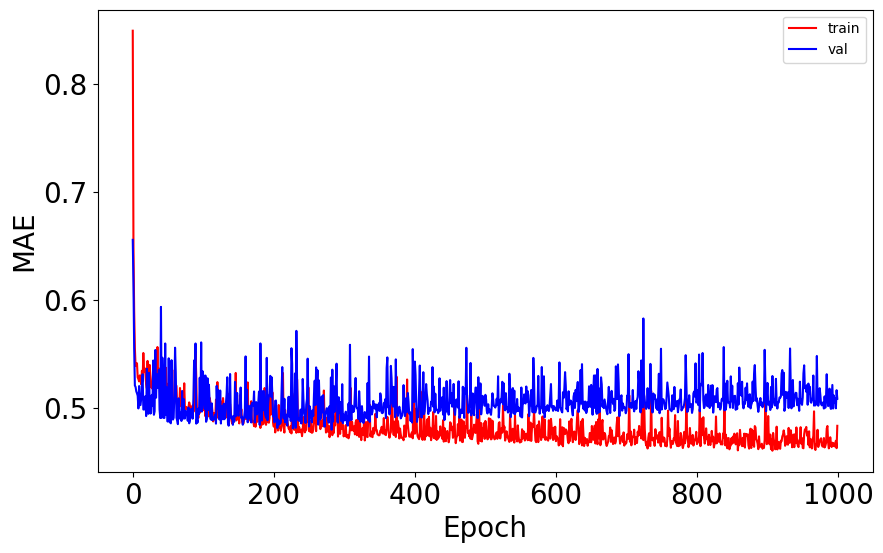

In [16]:
#Graficar el MAE
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['mae']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_mae']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'MAE', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

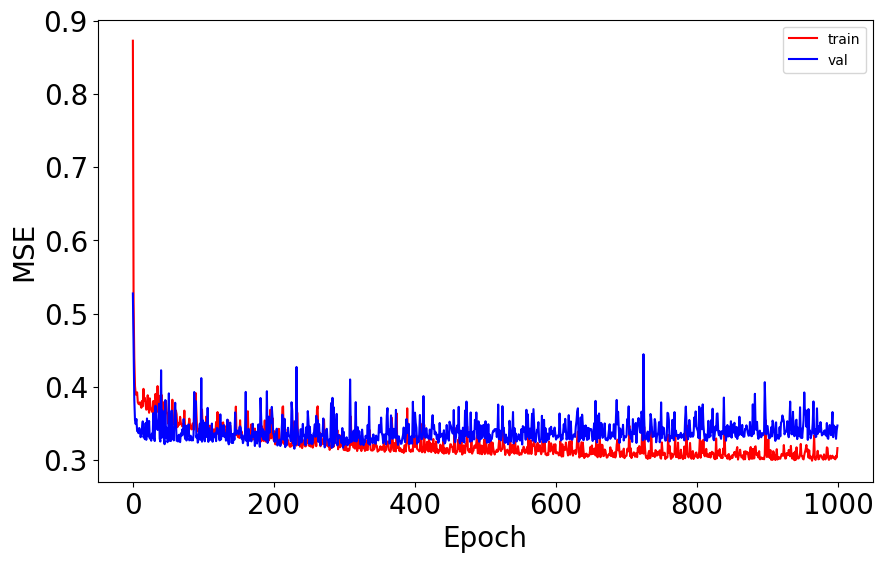

In [17]:
#Graficar el MSE
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['mse']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_mse']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'MSE', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

Con los gráficos de arriba podemos observar que tanto las métricas de train y de validación disminuyen exponencialmentes con el incremento del número de épocas. 

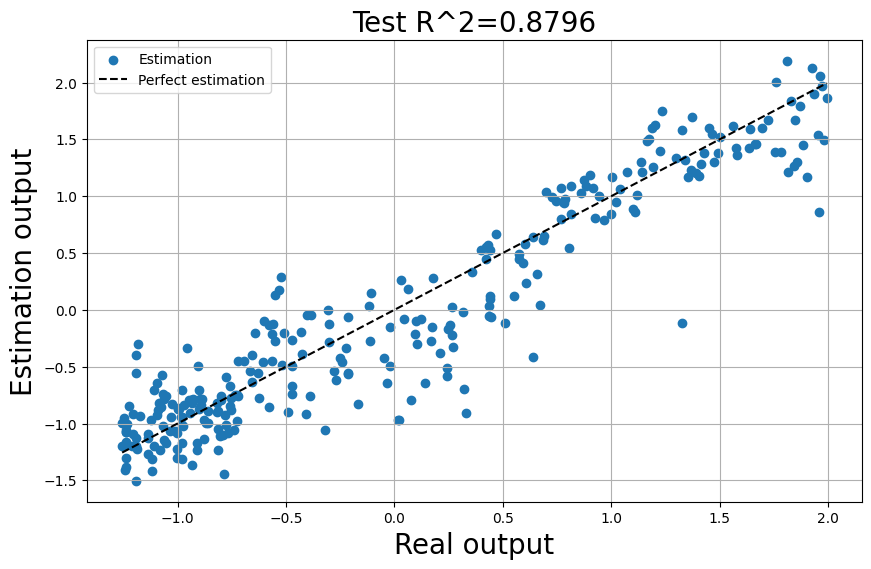

In [18]:
#Predecir
yhat = model.predict(X_test)

#Calcular R2
R2_score = r2_score(y_test,yhat)

#Graficar la R2
xmin,xmax = min(y_test),max(y_test)
xline = np.linspace(xmin,xmax)
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test,yhat,label='Estimation')
plt.plot(xline,xline,'k--',label='Perfect estimation')
plt.xlabel('Real output', fontsize=20)
plt.ylabel('Estimation output', fontsize=20)
plt.title('Test R^2=%0.4f'%R2_score, fontsize=20)
plt.legend()
plt.grid()
plt.show()

In [19]:
#Calcular métricas
mae_nn=metrics.mean_absolute_error(y_test, yhat)
mse_nn=metrics.mean_squared_error(y_test, yhat)
r2_nn=metrics.r2_score(y_test, yhat)

# imprimir Métricas
print('R2 square:',r2_nn)
print('MAE: ', mae_nn)
print('MSE: ', mse_nn)

R2 square: 0.8795939280874389
MAE:  0.2587862027977585
MSE:  0.12040607191256118


#### Resultados con train test split

In [20]:
data_compar_train_test = {'Modelo': ['LR', 'LR RFE', 'Ridge', 'RF', ' SVR', 'NN'], 'R2': [r2_lr, r2_rfe, r2_ridge, r2_rf, r2_svr, r2_nn], 'MSE': [mse_lr, mse_rfe, mse_ridge, mse_rf, mse_svr, mse_nn], 'MAE': [mae_lr, mae_rfe, mae_ridge,mae_rf,mae_svr, mae_nn]} 
data_compar_train_test = pd.DataFrame(data_compar_train_test)
data_compar_train_test

,Modelo,R2,MSE,MAE
0,LR,0.836411,0.163589,0.311901
1,LR RFE,0.836717,0.163283,0.311510
2,Ridge,0.836417,0.163583,0.311934
3,RF,0.908458,0.091542,0.214421
4,SVR,0.893997,0.106003,0.236861
5,NN,0.879594,0.120406,0.258786


### Cross Validation con optimización de hiperparámetros

La idea es dividir los datos en train y test, entrenar múltiples modelos muestreando los datos de entrenamiento. 
Finalmente probar el modelo en el test set



<img style="float: center; margin: 0px 0px 15px 15px;" src="https://miro.medium.com/max/700/1*4G__SV580CxFj78o9yUXuQ.png" width="450px" height="280px" />


In [21]:
#Configurar los folds que vamos a usar para todos los modelos
n_folds = 5
seed = 7
scoring = 'neg_mean_squared_error'
kfold = KFold(n_splits=n_folds, random_state=seed, shuffle=True)

#### Regresión Lineal

In [22]:
#Inicializar modelo
lm=LinearRegression()

#Hacer el cross validation y probar con el train
r2_lr= (cross_val_score(lm, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_lr= -(cross_val_score(lm, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_lr= (-cross_val_score(lm, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_lr)
print("MAE Train", mae_lr)
print("MSE Train", mse_lr)

R2 train 0.8158013380172221
MAE Train 0.3258039481837593
MSE Train 0.18158541560608502


In [23]:
#Performance en el test
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)

mae_lr=metrics.mean_absolute_error(y_test,y_pred)
mse_lr=metrics.mean_squared_error(y_test,y_pred)
r2_lr=metrics.r2_score(y_test,y_pred)

results_lr = pd.DataFrame([['Linear regression', mae_lr,mse_lr,r2_lr]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_lr


,Model,MAE,MSE,R2
0,Linear regression,0.311901,0.163589,0.836411


#### Regresión lineal con selección de variables (RFE)

In [24]:
# Hacer el grid search
#Especificar el modelo
lm = LinearRegression()
#Ajustar datos
lm.fit(X_train, y_train)
#Inicializar modelo de Recursive Feature Elimination para selección de variables
rfe = RFE(lm)             

#Especificar rango de hiperparámetros a tunear
hyper_params = [{'n_features_to_select': list(range(1, np.shape(X_train)[1]+1))}]

# Crear el grid search
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = kfold, 
                        verbose = 1,
                        return_train_score=True)      


#Performance en el test
model_cv.fit(X_train,y_train)
y_pred = model_cv.predict(X_test)

mae_rfe=metrics.mean_absolute_error(y_test,y_pred)
mse_rfe=metrics.mean_squared_error(y_test,y_pred)
r2_rfe=metrics.r2_score(y_test,y_pred)

results_rfe = pd.DataFrame([['Linear regression RFE', mae_rfe,mse_rfe,r2_rfe]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_rfe

Fitting 5 folds for each of 5 candidates, totalling 25 fits


,Model,MAE,MSE,R2
0,Linear regression RFE,0.31151,0.163283,0.836717


#### Ridge

In [25]:
from sklearn.linear_model import RidgeCV
#Inicializar modelo de Ridge con cross validation para seleccionar el hiperparámetro de alpha óptimo
model = RidgeCV(alphas=np.arange(0.01,5,0.01), cv=kfold, scoring='neg_mean_squared_error') 
#Entreno modelo
model.fit(X_train, y_train)

#Alfa óptima
print('alfa: %f' % model.alpha_)

#Performance en el test
y_pred = model.predict(X_test)

mae_ridge=metrics.mean_absolute_error(y_test,y_pred)
mse_ridge=metrics.mean_squared_error(y_test,y_pred)
r2_ridge=metrics.r2_score(y_test,y_pred)

results_ridge = pd.DataFrame([['Linear regression Ridge', mae_ridge,mse_ridge,r2_ridge]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_ridge

alfa: 4.240000


,Model,MAE,MSE,R2
0,Linear regression Ridge,0.312042,0.163572,0.836428


#### Random Forest



In [26]:
from sklearn.ensemble import RandomForestRegressor

#Usando cross validation y grid search
from sklearn.model_selection import GridSearchCV
#Inicializo modelo
model = RandomForestRegressor(min_samples_leaf=1,
                               max_features='auto',
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)
#Grid search para optimizar hiperparámetros
gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 11), #profundidad del árbol
                                'min_samples_split': range(10, 60, 10),
                                'n_estimators': [100, 300, 500, 800], #número de árboles
                                'criterion': ['mse']}, 
                  cv=kfold,
                  scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

print(gs.best_params_)

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

{'criterion': 'mse', 'max_depth': 8, 'min_samples_split': 30, 'n_estimators': 800}


In [28]:
#crear modelo usando parámetros óptimos
new_model_RF = RandomForestRegressor(n_estimators=800,
                               criterion='mse',
                               max_depth=8,
                               min_samples_split=30,
                               min_samples_leaf=1,
                               max_features='auto',
                               bootstrap=True,
                               oob_score=False,
                               random_state=0)
#Entreno modelo optimizado
new_model_RF.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
r2_rf= (cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_rf= -(cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_rf= (-cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_rf)
print("MAE Train", mae_rf)
print("MSE Train", mse_rf)

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pa

C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R2 train 0.8920603214443167
MAE Train 0.21984381446970488
MSE Train 0.10667653653789569


In [29]:
#Performance en el test
y_pred = new_model_RF.predict(X_test)

mae_rf=metrics.mean_absolute_error(y_test,y_pred)
mse_rf=metrics.mean_squared_error(y_test,y_pred)
r2_rf=metrics.r2_score(y_test,y_pred)

results_rf = pd.DataFrame([['Random Forest', mae_rf,mse_rf,r2_rf]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_rf

,Model,MAE,MSE,R2
0,Random Forest,0.208829,0.085517,0.914483


#### Árbol de decisión

In [30]:
#Usando cross validation y grid search
tree = DecisionTreeRegressor()

#Grid search para optimizar hiperparámetros
gs = GridSearchCV(tree,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                  cv=kfold,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)

{'max_depth': 7, 'min_samples_split': 50}


In [31]:
#crear modelo usando parámetros óptimos
new_model_tree = DecisionTreeRegressor(max_depth=7,
                                  min_samples_split=50)

#Entreno modelo optimizado
new_model_tree.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
r2_tree= (cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_tree= -(cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_tree= (-cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_tree)
print("MAE Train", mae_tree)
print("MSE Train", mse_tree)

R2 train 0.8833332245009938
MAE Train 0.22517186175054055
MSE Train 0.11514499443663606


In [32]:
#Performance en el test
y_pred = new_model_tree.predict(X_test)

mae_tree=metrics.mean_absolute_error(y_test,y_pred)
mse_tree=metrics.mean_squared_error(y_test,y_pred)
r2_tree=metrics.r2_score(y_test,y_pred)

results_tree = pd.DataFrame([['Decision Tree', mae_tree,mse_tree,r2_tree]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_tree 

,Model,MAE,MSE,R2
0,Decision Tree,0.2231,0.108104,0.891896


#### Máquina de vector soporte (SVR)

In [33]:
#proponer malla para el gridsearch
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

model = SVR()

gs = GridSearchCV(model,
                  tuned_parameters, 
                  cv=kfold,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [34]:
#crear modelo usando parámetros óptimos
new_model_svr = SVR(kernel='rbf', C=1000, gamma=0.001)

#Entreno modelo optimizado
new_model_svr.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
r2_svr= (cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_svr= -(cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_svr= (-cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_svr)
print("MAE Train", mae_svr)
print("MSE Train", mse_svr)

R2 train 0.8833332245009938
MAE Train 0.22517186175054055
MSE Train 0.11514499443663606


In [35]:
#Performance en el test
y_pred = new_model_svr.predict(X_test)

mae_svr=metrics.mean_absolute_error(y_test,y_pred)
mse_svr=metrics.mean_squared_error(y_test,y_pred)
r2_svr=metrics.r2_score(y_test,y_pred)

results_svr = pd.DataFrame([['SVR', mae_svr,mse_svr,r2_svr]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_svr 

,Model,MAE,MSE,R2
0,SVR,0.257272,0.118553,0.881447


#### Red Neuronal

In [36]:
def create_model(lr=0.1,momentum=0.8):
    # Neural network architecture
    model = Sequential()
    model.add(Dense(12,activation='relu',input_dim=5))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(1,activation='linear'))
    # Optimizer configuration
    opt = tensorflow.keras.optimizers.SGD(lr=lr,momentum=momentum)
    model.compile(loss = 'mean_squared_error',
                  optimizer=opt,
                  metrics=['mse'])
    return model

epochs = 200
batch_size = 100

model_search = KerasRegressor(build_fn=create_model,epochs=epochs)

# Definir los parámetros del grid search
lr = [0.1, 0.05, 0.01]
momentum = [0.8, 0.6, 0.4]
param_grid = dict(lr=lr,momentum=momentum)

selection_score = make_scorer(mean_squared_error,greater_is_better=False) #MSE

grid = GridSearchCV(estimator=model_search, param_grid=param_grid,
                    cv=kfold,return_train_score=True,
                    scoring=selection_score)

grid_result = grid.fit(X_train, y_train)

print('Mejores parámetros:')
print(grid_result.best_params_)


Epoch 1/200


C:\Users\HP250G~1\AppData\Local\Temp/ipykernel_17736/698256605.py:17: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_search = KerasRegressor(build_fn=create_model,epochs=epochs)
C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.4187 - mse: 0.4187
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1964 - mse: 0.1964
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1669 - mse: 0.1669
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1683 - mse: 0.1683
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1676 - mse: 0.1676
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1769 - mse: 0.1769
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1623 - mse: 0.1623
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1672 - mse: 0.1672
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1523 - mse: 0.1523
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1603 - mse: 0.1603
Epoch 11/200
17/17 [==============================] - 0s 3ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1195 - mse: 0.1195
Epoch 88/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1104 - mse: 0.1104
Epoch 89/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1140 - mse: 0.1140
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1173 - mse: 0.1173
Epoch 91/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1067 - mse: 0.1067
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1059 - mse: 0.1059
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1143 - mse: 0.1143
Epoch 94/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1358 - mse: 0.1358
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1218 - mse: 0.1218
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1150 - mse: 0.1150
Epoch 97/200
17/17 [==============================] - 0s 3ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1011 - mse: 0.1011
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1017 - mse: 0.1017
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1027 - mse: 0.1027
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1017 - mse: 0.1017
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0998 - mse: 0.0998
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1032 - mse: 0.1032
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1018 - mse: 0.1018
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1008 - mse: 0.1008
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1023 - mse: 0.1023
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1087 - mse: 0.1087
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.3734 - mse: 0.3734
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1893 - mse: 0.1893
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1642 - mse: 0.1642
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1746 - mse: 0.1746
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1593 - mse: 0.1593
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1525 - mse: 0.1525
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1498 - mse: 0.1498
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1543 - mse: 0.1543
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1471 - mse: 0.1471
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1484 - mse: 0.1484
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1238 - mse: 0.1238
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1211 - mse: 0.1211
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1222 - mse: 0.1222
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1291 - mse: 0.1291
Epoch 91/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1327 - mse: 0.1327
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1237 - mse: 0.1237
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1192 - mse: 0.1192
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1272 - mse: 0.1272
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1318 - mse: 0.1318
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1262 - mse: 0.1262
Epoch 97/200
17/17 [==============================] - 0s 3ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1170 - mse: 0.1170
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1151 - mse: 0.1151
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1110 - mse: 0.1110
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1141 - mse: 0.1141
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1220 - mse: 0.1220
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1171 - mse: 0.1171
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1390 - mse: 0.1390
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1117 - mse: 0.1117
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1133 - mse: 0.1133
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1171 - mse: 0.1171
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.4628 - mse: 0.4628
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2353 - mse: 0.2353
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1688 - mse: 0.1688
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1564 - mse: 0.1564
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1515 - mse: 0.1515
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1506 - mse: 0.1506
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1409 - mse: 0.1409
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1342 - mse: 0.1342
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1402 - mse: 0.1402
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1377 - mse: 0.1377
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1075 - mse: 0.1075
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1057 - mse: 0.1057
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1236 - mse: 0.1236
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1216 - mse: 0.1216
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1168 - mse: 0.1168
Epoch 92/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1160 - mse: 0.1160
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1096 - mse: 0.1096
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1074 - mse: 0.1074
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1160 - mse: 0.1160
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1190 - mse: 0.1190
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 3ms/step - loss: 0.1007 - mse: 0.1007
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1002 - mse: 0.1002
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1030 - mse: 0.1030
Epoch 175/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1040 - mse: 0.1040
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1050 - mse: 0.1050
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1038 - mse: 0.1038
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1065 - mse: 0.1065
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0957 - mse: 0.0957
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1088 - mse: 0.1088
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1021 - mse: 0.1021
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.3485 - mse: 0.3485
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1897 - mse: 0.1897
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1865 - mse: 0.1865
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1749 - mse: 0.1749
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1533 - mse: 0.1533
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1492 - mse: 0.1492
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1454 - mse: 0.1454
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1501 - mse: 0.1501
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1474 - mse: 0.1474
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1495 - mse: 0.1495
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 3ms/step - loss: 0.1239 - mse: 0.1239
Epoch 88/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1291 - mse: 0.1291
Epoch 89/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1183 - mse: 0.1183
Epoch 90/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1201 - mse: 0.1201
Epoch 91/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1220 - mse: 0.1220
Epoch 92/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1229 - mse: 0.1229
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1296 - mse: 0.1296
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1209 - mse: 0.1209
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1192 - mse: 0.1192
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1154 - mse: 0.1154
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 3ms/step - loss: 0.1163 - mse: 0.1163
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1124 - mse: 0.1124
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1172 - mse: 0.1172
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1094 - mse: 0.1094
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1071 - mse: 0.1071
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1190 - mse: 0.1190
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1179 - mse: 0.1179
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1077 - mse: 0.1077
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1121 - mse: 0.1121
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1135 - mse: 0.1135
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.4345 - mse: 0.4345
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2129 - mse: 0.2129
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1810 - mse: 0.1810
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1819 - mse: 0.1819
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1626 - mse: 0.1626
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1637 - mse: 0.1637
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1512 - mse: 0.1512
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1518 - mse: 0.1518
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1433 - mse: 0.1433
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1515 - mse: 0.1515
Epoch 11/200
17/17 [==============================] - 0s 4ms/step - los

17/17 [==============================] - 0s 4ms/step - loss: 0.1201 - mse: 0.1201
Epoch 88/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1224 - mse: 0.1224
Epoch 89/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1092 - mse: 0.1092
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1219 - mse: 0.1219
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1328 - mse: 0.1328
Epoch 92/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1179 - mse: 0.1179
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1117 - mse: 0.1117
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1193 - mse: 0.1193
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1398 - mse: 0.1398
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1143 - mse: 0.1143
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 3ms/step - loss: 0.1172 - mse: 0.1172
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1050 - mse: 0.1050
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1173 - mse: 0.1173
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1174 - mse: 0.1174
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1440 - mse: 0.1440
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1122 - mse: 0.1122
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1111 - mse: 0.1111
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1166 - mse: 0.1166
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1200 - mse: 0.1200
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1036 - mse: 0.1036
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.2841 - mse: 0.2841
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1672 - mse: 0.1672
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1667 - mse: 0.1667
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1518 - mse: 0.1518
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1459 - mse: 0.1459
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1517 - mse: 0.1517
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1401 - mse: 0.1401
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1427 - mse: 0.1427
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1390 - mse: 0.1390
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1471 - mse: 0.1471
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1070 - mse: 0.1070
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1091 - mse: 0.1091
Epoch 89/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1129 - mse: 0.1129
Epoch 90/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1120 - mse: 0.1120
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1107 - mse: 0.1107
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1129 - mse: 0.1129
Epoch 93/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1135 - mse: 0.1135
Epoch 94/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1099 - mse: 0.1099
Epoch 95/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1076 - mse: 0.1076
Epoch 96/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1125 - mse: 0.1125
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.0988 - mse: 0.0988
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0989 - mse: 0.0989
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1031 - mse: 0.1031
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0999 - mse: 0.0999
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1018 - mse: 0.1018
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1030 - mse: 0.1030
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1014 - mse: 0.1014
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1041 - mse: 0.1041
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0998 - mse: 0.0998
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0994 - mse: 0.0994
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.4300 - mse: 0.4300
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1771 - mse: 0.1771
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1610 - mse: 0.1610
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1605 - mse: 0.1605
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1499 - mse: 0.1499
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1459 - mse: 0.1459
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1421 - mse: 0.1421
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1384 - mse: 0.1384
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1451 - mse: 0.1451
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1406 - mse: 0.1406
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1241 - mse: 0.1241
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1204 - mse: 0.1204
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1123 - mse: 0.1123
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1298 - mse: 0.1298
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1186 - mse: 0.1186
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1183 - mse: 0.1183
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1224 - mse: 0.1224
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1195 - mse: 0.1195
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1156 - mse: 0.1156
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1198 - mse: 0.1198
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 4ms/step - loss: 0.1173 - mse: 0.1173
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1137 - mse: 0.1137
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1166 - mse: 0.1166
Epoch 175/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1157 - mse: 0.1157
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1153 - mse: 0.1153
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1133 - mse: 0.1133
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1167 - mse: 0.1167
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1185 - mse: 0.1185
Epoch 180/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1084 - mse: 0.1084
Epoch 181/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1169 - mse: 0.1169
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.3618 - mse: 0.3618
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1719 - mse: 0.1719
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1496 - mse: 0.1496
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1424 - mse: 0.1424
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1421 - mse: 0.1421
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1369 - mse: 0.1369
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1410 - mse: 0.1410
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1464 - mse: 0.1464
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1342 - mse: 0.1342
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1338 - mse: 0.1338
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1160 - mse: 0.1160
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1105 - mse: 0.1105
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1100 - mse: 0.1100
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1164 - mse: 0.1164
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1174 - mse: 0.1174
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1149 - mse: 0.1149
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1135 - mse: 0.1135
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1126 - mse: 0.1126
Epoch 95/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1108 - mse: 0.1108
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1135 - mse: 0.1135
Epoch 97/200
17/17 [==============================] - 0s 3ms/st

17/17 [==============================] - 0s 4ms/step - loss: 0.1087 - mse: 0.1087
Epoch 173/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1075 - mse: 0.1075
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1057 - mse: 0.1057
Epoch 175/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1047 - mse: 0.1047
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1114 - mse: 0.1114
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1027 - mse: 0.1027
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1121 - mse: 0.1121
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1055 - mse: 0.1055
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1138 - mse: 0.1138
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1114 - mse: 0.1114
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.4806 - mse: 0.4806
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2355 - mse: 0.2355
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1921 - mse: 0.1921
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1820 - mse: 0.1820
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1662 - mse: 0.1662
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1659 - mse: 0.1659
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1621 - mse: 0.1621
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1668 - mse: 0.1668
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1584 - mse: 0.1584
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1716 - mse: 0.1716
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1303 - mse: 0.1303
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1270 - mse: 0.1270
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1272 - mse: 0.1272
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1278 - mse: 0.1278
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1259 - mse: 0.1259
Epoch 92/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1216 - mse: 0.1216
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1245 - mse: 0.1245
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1239 - mse: 0.1239
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1197 - mse: 0.1197
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1262 - mse: 0.1262
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 3ms/step - loss: 0.1210 - mse: 0.1210
Epoch 173/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1136 - mse: 0.1136
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1213 - mse: 0.1213
Epoch 175/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1143 - mse: 0.1143
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1181 - mse: 0.1181
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1167 - mse: 0.1167
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1125 - mse: 0.1125
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1137 - mse: 0.1137
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1231 - mse: 0.1231
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1222 - mse: 0.1222
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.4683 - mse: 0.4683
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1940 - mse: 0.1940
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1778 - mse: 0.1778
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1682 - mse: 0.1682
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1693 - mse: 0.1693
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1563 - mse: 0.1563
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1642 - mse: 0.1642
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1515 - mse: 0.1515
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1502 - mse: 0.1502
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1491 - mse: 0.1491
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1215 - mse: 0.1215
Epoch 88/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1150 - mse: 0.1150
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1154 - mse: 0.1154
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1218 - mse: 0.1218
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1257 - mse: 0.1257
Epoch 92/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1135 - mse: 0.1135
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1153 - mse: 0.1153
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1142 - mse: 0.1142
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1142 - mse: 0.1142
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1187 - mse: 0.1187
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 4ms/step - loss: 0.1078 - mse: 0.1078
Epoch 173/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1072 - mse: 0.1072
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1077 - mse: 0.1077
Epoch 175/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1125 - mse: 0.1125
Epoch 176/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1042 - mse: 0.1042
Epoch 177/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1077 - mse: 0.1077
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1110 - mse: 0.1110
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1101 - mse: 0.1101
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1063 - mse: 0.1063
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1063 - mse: 0.1063
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.4131 - mse: 0.4131
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2014 - mse: 0.2014
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1915 - mse: 0.1915
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1772 - mse: 0.1772
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1647 - mse: 0.1647
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1626 - mse: 0.1626
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1556 - mse: 0.1556
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1529 - mse: 0.1529
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1537 - mse: 0.1537
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1472 - mse: 0.1472
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1210 - mse: 0.1210
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1245 - mse: 0.1245
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1174 - mse: 0.1174
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1170 - mse: 0.1170
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1151 - mse: 0.1151
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1214 - mse: 0.1214
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1178 - mse: 0.1178
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1252 - mse: 0.1252
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1237 - mse: 0.1237
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1162 - mse: 0.1162
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1151 - mse: 0.1151
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1112 - mse: 0.1112
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1098 - mse: 0.1098
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1093 - mse: 0.1093
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1141 - mse: 0.1141
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1144 - mse: 0.1144
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1143 - mse: 0.1143
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1079 - mse: 0.1079
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1104 - mse: 0.1104
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1087 - mse: 0.1087
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.3762 - mse: 0.3762
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2012 - mse: 0.2012
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1789 - mse: 0.1789
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1711 - mse: 0.1711
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1668 - mse: 0.1668
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1611 - mse: 0.1611
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1535 - mse: 0.1535
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1650 - mse: 0.1650
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1602 - mse: 0.1602
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1491 - mse: 0.1491
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1241 - mse: 0.1241
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1205 - mse: 0.1205
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1256 - mse: 0.1256
Epoch 90/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1205 - mse: 0.1205
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1252 - mse: 0.1252
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1199 - mse: 0.1199
Epoch 93/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1292 - mse: 0.1292
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1221 - mse: 0.1221
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1192 - mse: 0.1192
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1211 - mse: 0.1211
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 4ms/step - loss: 0.1226 - mse: 0.1226
Epoch 173/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1124 - mse: 0.1124
Epoch 174/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1144 - mse: 0.1144
Epoch 175/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1142 - mse: 0.1142
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1158 - mse: 0.1158
Epoch 177/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1175 - mse: 0.1175
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1165 - mse: 0.1165
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1136 - mse: 0.1136
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1182 - mse: 0.1182
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1161 - mse: 0.1161
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.4048 - mse: 0.4048
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1566 - mse: 0.1566
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1443 - mse: 0.1443
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1362 - mse: 0.1362
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1349 - mse: 0.1349
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1348 - mse: 0.1348
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1343 - mse: 0.1343
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1312 - mse: 0.1312
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1364 - mse: 0.1364
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1283 - mse: 0.1283
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 3ms/step - loss: 0.1141 - mse: 0.1141
Epoch 88/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1180 - mse: 0.1180
Epoch 89/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1104 - mse: 0.1104
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1127 - mse: 0.1127
Epoch 91/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1092 - mse: 0.1092
Epoch 92/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1094 - mse: 0.1094
Epoch 93/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1088 - mse: 0.1088
Epoch 94/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1095 - mse: 0.1095
Epoch 95/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1124 - mse: 0.1124
Epoch 96/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1128 - mse: 0.1128
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 3ms/step - loss: 0.1057 - mse: 0.1057
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1038 - mse: 0.1038
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1081 - mse: 0.1081
Epoch 175/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1058 - mse: 0.1058
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1068 - mse: 0.1068
Epoch 177/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1027 - mse: 0.1027
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1054 - mse: 0.1054
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1074 - mse: 0.1074
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1051 - mse: 0.1051
Epoch 181/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1069 - mse: 0.1069
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.3750 - mse: 0.3750
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1900 - mse: 0.1900
Epoch 3/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1735 - mse: 0.1735
Epoch 4/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1678 - mse: 0.1678
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1636 - mse: 0.1636
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1542 - mse: 0.1542
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1535 - mse: 0.1535
Epoch 8/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1563 - mse: 0.1563
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1519 - mse: 0.1519
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1494 - mse: 0.1494
Epoch 11/200
17/17 [==============================] - 0s 3ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1217 - mse: 0.1217
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1245 - mse: 0.1245
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1259 - mse: 0.1259
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1260 - mse: 0.1260
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1219 - mse: 0.1219
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1272 - mse: 0.1272
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1240 - mse: 0.1240
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1235 - mse: 0.1235
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1229 - mse: 0.1229
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1224 - mse: 0.1224
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1185 - mse: 0.1185
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1264 - mse: 0.1264
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1176 - mse: 0.1176
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1170 - mse: 0.1170
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1246 - mse: 0.1246
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1201 - mse: 0.1201
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1225 - mse: 0.1225
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1195 - mse: 0.1195
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1260 - mse: 0.1260
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1206 - mse: 0.1206
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.3713 - mse: 0.3713
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1933 - mse: 0.1933
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1768 - mse: 0.1768
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1664 - mse: 0.1664
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1723 - mse: 0.1723
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1559 - mse: 0.1559
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1565 - mse: 0.1565
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1519 - mse: 0.1519
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1514 - mse: 0.1514
Epoch 10/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1482 - mse: 0.1482
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1192 - mse: 0.1192
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1212 - mse: 0.1212
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1209 - mse: 0.1209
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1234 - mse: 0.1234
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1215 - mse: 0.1215
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1210 - mse: 0.1210
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1227 - mse: 0.1227
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1201 - mse: 0.1201
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1225 - mse: 0.1225
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1208 - mse: 0.1208
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 3ms/step - loss: 0.1104 - mse: 0.1104
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1123 - mse: 0.1123
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1121 - mse: 0.1121
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1114 - mse: 0.1114
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1113 - mse: 0.1113
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1157 - mse: 0.1157
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1140 - mse: 0.1140
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1118 - mse: 0.1118
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1079 - mse: 0.1079
Epoch 181/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1101 - mse: 0.1101
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.5307 - mse: 0.5307
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1804 - mse: 0.1804
Epoch 3/200
17/17 [==============================] - 0s 864us/step - loss: 0.1566 - mse: 0.1566
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1493 - mse: 0.1493
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1470 - mse: 0.1470
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1418 - mse: 0.1418
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1363 - mse: 0.1363
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1347 - mse: 0.1347
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1287 - mse: 0.1287
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1318 - mse: 0.1318
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - l

17/17 [==============================] - 0s 2ms/step - loss: 0.1039 - mse: 0.1039
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1117 - mse: 0.1117
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1065 - mse: 0.1065
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1114 - mse: 0.1114
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1175 - mse: 0.1175
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1103 - mse: 0.1103
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1065 - mse: 0.1065
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1117 - mse: 0.1117
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1107 - mse: 0.1107
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1050 - mse: 0.1050
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1095 - mse: 0.1095
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0994 - mse: 0.0994
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1055 - mse: 0.1055
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1039 - mse: 0.1039
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0998 - mse: 0.0998
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1027 - mse: 0.1027
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1024 - mse: 0.1024
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1025 - mse: 0.1025
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1006 - mse: 0.1006
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1027 - mse: 0.1027
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.5789 - mse: 0.5789
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1987 - mse: 0.1987
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1695 - mse: 0.1695
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1596 - mse: 0.1596
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1500 - mse: 0.1500
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1537 - mse: 0.1537
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1458 - mse: 0.1458
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1480 - mse: 0.1480
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1463 - mse: 0.1463
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1432 - mse: 0.1432
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1265 - mse: 0.1265
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1180 - mse: 0.1180
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1182 - mse: 0.1182
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1321 - mse: 0.1321
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1209 - mse: 0.1209
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1287 - mse: 0.1287
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1170 - mse: 0.1170
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1146 - mse: 0.1146
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1209 - mse: 0.1209
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1168 - mse: 0.1168
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 3ms/step - loss: 0.1137 - mse: 0.1137
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1201 - mse: 0.1201
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1147 - mse: 0.1147
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1129 - mse: 0.1129
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1120 - mse: 0.1120
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1183 - mse: 0.1183
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1198 - mse: 0.1198
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1263 - mse: 0.1263
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1150 - mse: 0.1150
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1166 - mse: 0.1166
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.4307 - mse: 0.4307
Epoch 2/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1579 - mse: 0.1579
Epoch 3/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1424 - mse: 0.1424
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1372 - mse: 0.1372
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1406 - mse: 0.1406
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1320 - mse: 0.1320
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1268 - mse: 0.1268
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1247 - mse: 0.1247
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1254 - mse: 0.1254
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1211 - mse: 0.1211
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1008 - mse: 0.1008
Epoch 88/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1021 - mse: 0.1021
Epoch 89/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1034 - mse: 0.1034
Epoch 90/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1032 - mse: 0.1032
Epoch 91/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0978 - mse: 0.0978
Epoch 92/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0992 - mse: 0.0992
Epoch 93/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1067 - mse: 0.1067
Epoch 94/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1002 - mse: 0.1002
Epoch 95/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0996 - mse: 0.0996
Epoch 96/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1038 - mse: 0.1038
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.0927 - mse: 0.0927
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0965 - mse: 0.0965
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0900 - mse: 0.0900
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0900 - mse: 0.0900
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0926 - mse: 0.0926
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0945 - mse: 0.0945
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0939 - mse: 0.0939
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0923 - mse: 0.0923
Epoch 180/200
17/17 [==============================] - 0s 936us/step - loss: 0.0917 - mse: 0.0917
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0937 - mse: 0.0937
Epoch 182/200
17/17 [==============================]

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.3644 - mse: 0.3644
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1832 - mse: 0.1832
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1723 - mse: 0.1723
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1704 - mse: 0.1704
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1632 - mse: 0.1632
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1530 - mse: 0.1530
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1589 - mse: 0.1589
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1515 - mse: 0.1515
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1523 - mse: 0.1523
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1428 - mse: 0.1428
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1184 - mse: 0.1184
Epoch 88/200
17/17 [==============================] - 0s 971us/step - loss: 0.1170 - mse: 0.1170
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1254 - mse: 0.1254
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1158 - mse: 0.1158
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1181 - mse: 0.1181
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1233 - mse: 0.1233
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1221 - mse: 0.1221
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1226 - mse: 0.1226
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1155 - mse: 0.1155
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1178 - mse: 0.1178
Epoch 97/200
17/17 [==============================] - 0s 1ms/

17/17 [==============================] - 0s 1ms/step - loss: 0.1146 - mse: 0.1146
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1123 - mse: 0.1123
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1093 - mse: 0.1093
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1083 - mse: 0.1083
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1095 - mse: 0.1095
Epoch 177/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1095 - mse: 0.1095
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1183 - mse: 0.1183
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1119 - mse: 0.1119
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1121 - mse: 0.1121
Epoch 181/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1136 - mse: 0.1136
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.4538 - mse: 0.4538
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2082 - mse: 0.2082
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1879 - mse: 0.1879
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1772 - mse: 0.1772
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1647 - mse: 0.1647
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1560 - mse: 0.1560
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1537 - mse: 0.1537
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1558 - mse: 0.1558
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1531 - mse: 0.1531
Epoch 10/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1502 - mse: 0.1502
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1101 - mse: 0.1101
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1218 - mse: 0.1218
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1139 - mse: 0.1139
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1120 - mse: 0.1120
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1085 - mse: 0.1085
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1155 - mse: 0.1155
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1117 - mse: 0.1117
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1093 - mse: 0.1093
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1103 - mse: 0.1103
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1106 - mse: 0.1106
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1044 - mse: 0.1044
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0991 - mse: 0.0991
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1022 - mse: 0.1022
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0991 - mse: 0.0991
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0979 - mse: 0.0979
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0988 - mse: 0.0988
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1011 - mse: 0.1011
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0965 - mse: 0.0965
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1030 - mse: 0.1030
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0982 - mse: 0.0982
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 993us/step - loss: 0.4563 - mse: 0.4563
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1995 - mse: 0.1995
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1668 - mse: 0.1668
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1596 - mse: 0.1596
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1488 - mse: 0.1488
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1469 - mse: 0.1469
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1437 - mse: 0.1437
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1497 - mse: 0.1497
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1416 - mse: 0.1416
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1465 - mse: 0.1465
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - l

17/17 [==============================] - 0s 2ms/step - loss: 0.1184 - mse: 0.1184
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1191 - mse: 0.1191
Epoch 89/200
17/17 [==============================] - 0s 945us/step - loss: 0.1176 - mse: 0.1176
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1190 - mse: 0.1190
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1165 - mse: 0.1165
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1205 - mse: 0.1205
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1175 - mse: 0.1175
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1208 - mse: 0.1208
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1201 - mse: 0.1201
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1201 - mse: 0.1201
Epoch 97/200
17/17 [==============================] - 0s 1ms/

17/17 [==============================] - 0s 1ms/step - loss: 0.1123 - mse: 0.1123
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1149 - mse: 0.1149
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1110 - mse: 0.1110
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1125 - mse: 0.1125
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1137 - mse: 0.1137
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1214 - mse: 0.1214
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1124 - mse: 0.1124
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1131 - mse: 0.1131
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1110 - mse: 0.1110
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1164 - mse: 0.1164
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.4883 - mse: 0.4883
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2102 - mse: 0.2102
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1831 - mse: 0.1831
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1656 - mse: 0.1656
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1661 - mse: 0.1661
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1636 - mse: 0.1636
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1511 - mse: 0.1511
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1548 - mse: 0.1548
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1495 - mse: 0.1495
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1485 - mse: 0.1485
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1199 - mse: 0.1199
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1186 - mse: 0.1186
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1232 - mse: 0.1232
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1186 - mse: 0.1186
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1209 - mse: 0.1209
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1159 - mse: 0.1159
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1191 - mse: 0.1191
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1182 - mse: 0.1182
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1207 - mse: 0.1207
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1223 - mse: 0.1223
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 3ms/step - loss: 0.1132 - mse: 0.1132
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1136 - mse: 0.1136
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1169 - mse: 0.1169
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1161 - mse: 0.1161
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1140 - mse: 0.1140
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1142 - mse: 0.1142
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1195 - mse: 0.1195
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1210 - mse: 0.1210
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1149 - mse: 0.1149
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1233 - mse: 0.1233
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.4848 - mse: 0.4848
Epoch 2/200
17/17 [==============================] - 0s 963us/step - loss: 0.2015 - mse: 0.2015
Epoch 3/200
17/17 [==============================] - 0s 1000us/step - loss: 0.1688 - mse: 0.1688
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1553 - mse: 0.1553
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1497 - mse: 0.1497
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1437 - mse: 0.1437
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1441 - mse: 0.1441
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1396 - mse: 0.1396
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1381 - mse: 0.1381
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1367 - mse: 0.1367
Epoch 11/200
17/17 [==============================] - 0s 1ms/step 

17/17 [==============================] - 0s 1ms/step - loss: 0.1088 - mse: 0.1088
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1116 - mse: 0.1116
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1106 - mse: 0.1106
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1100 - mse: 0.1100
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1117 - mse: 0.1117
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1112 - mse: 0.1112
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1105 - mse: 0.1105
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1106 - mse: 0.1106
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1113 - mse: 0.1113
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1107 - mse: 0.1107
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1072 - mse: 0.1072
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1085 - mse: 0.1085
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1107 - mse: 0.1107
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1072 - mse: 0.1072
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1105 - mse: 0.1105
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1081 - mse: 0.1081
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1085 - mse: 0.1085
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1070 - mse: 0.1070
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1100 - mse: 0.1100
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1076 - mse: 0.1076
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.4912 - mse: 0.4912
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2303 - mse: 0.2303
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2067 - mse: 0.2067
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1975 - mse: 0.1975
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1831 - mse: 0.1831
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1759 - mse: 0.1759
Epoch 7/200
17/17 [==============================] - 0s 1000us/step - loss: 0.1693 - mse: 0.1693
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1684 - mse: 0.1684
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1597 - mse: 0.1597
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1585 - mse: 0.1585
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - 

17/17 [==============================] - 0s 1ms/step - loss: 0.1260 - mse: 0.1260
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1276 - mse: 0.1276
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1251 - mse: 0.1251
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1305 - mse: 0.1305
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1240 - mse: 0.1240
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1232 - mse: 0.1232
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1220 - mse: 0.1220
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1237 - mse: 0.1237
Epoch 95/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1210 - mse: 0.1210
Epoch 96/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1242 - mse: 0.1242
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1139 - mse: 0.1139
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1158 - mse: 0.1158
Epoch 174/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1192 - mse: 0.1192
Epoch 175/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1158 - mse: 0.1158
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1152 - mse: 0.1152
Epoch 177/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1208 - mse: 0.1208
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1168 - mse: 0.1168
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1137 - mse: 0.1137
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1136 - mse: 0.1136
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1149 - mse: 0.1149
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.4319 - mse: 0.4319
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2106 - mse: 0.2106
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1824 - mse: 0.1824
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1718 - mse: 0.1718
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1598 - mse: 0.1598
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1559 - mse: 0.1559
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1552 - mse: 0.1552
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1535 - mse: 0.1535
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1488 - mse: 0.1488
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1466 - mse: 0.1466
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 4ms/step - loss: 0.1158 - mse: 0.1158
Epoch 88/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1120 - mse: 0.1120
Epoch 89/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1135 - mse: 0.1135
Epoch 90/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1133 - mse: 0.1133
Epoch 91/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1139 - mse: 0.1139
Epoch 92/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1169 - mse: 0.1169
Epoch 93/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1109 - mse: 0.1109
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1109 - mse: 0.1109
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1119 - mse: 0.1119
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1097 - mse: 0.1097
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1043 - mse: 0.1043
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1079 - mse: 0.1079
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1066 - mse: 0.1066
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1081 - mse: 0.1081
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1090 - mse: 0.1090
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1066 - mse: 0.1066
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1058 - mse: 0.1058
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1061 - mse: 0.1061
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1051 - mse: 0.1051
Epoch 181/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1072 - mse: 0.1072
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.4442 - mse: 0.4442
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2480 - mse: 0.2480
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2131 - mse: 0.2131
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1983 - mse: 0.1983
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1834 - mse: 0.1834
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1709 - mse: 0.1709
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1621 - mse: 0.1621
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1595 - mse: 0.1595
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1601 - mse: 0.1601
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1558 - mse: 0.1558
Epoch 11/200
17/17 [==============================] - 0s 3ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1243 - mse: 0.1243
Epoch 88/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1215 - mse: 0.1215
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1214 - mse: 0.1214
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1240 - mse: 0.1240
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1221 - mse: 0.1221
Epoch 92/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1214 - mse: 0.1214
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1197 - mse: 0.1197
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1251 - mse: 0.1251
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1223 - mse: 0.1223
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1217 - mse: 0.1217
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1146 - mse: 0.1146
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1129 - mse: 0.1129
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1130 - mse: 0.1130
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1152 - mse: 0.1152
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1107 - mse: 0.1107
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1145 - mse: 0.1145
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1142 - mse: 0.1142
Epoch 179/200
17/17 [==============================] - 0s 939us/step - loss: 0.1127 - mse: 0.1127
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1151 - mse: 0.1151
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1147 - mse: 0.1147
Epoch 182/200
17/17 [==============================]

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.5058 - mse: 0.5058
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2379 - mse: 0.2379
Epoch 3/200
17/17 [==============================] - 0s 835us/step - loss: 0.2064 - mse: 0.2064
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1905 - mse: 0.1905
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1812 - mse: 0.1812
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1660 - mse: 0.1660
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1660 - mse: 0.1660
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1548 - mse: 0.1548
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1539 - mse: 0.1539
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1539 - mse: 0.1539
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - l

17/17 [==============================] - 0s 1ms/step - loss: 0.1164 - mse: 0.1164
Epoch 88/200
17/17 [==============================] - 0s 766us/step - loss: 0.1132 - mse: 0.1132
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1115 - mse: 0.1115
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1145 - mse: 0.1145
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1157 - mse: 0.1157
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1132 - mse: 0.1132
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1120 - mse: 0.1120
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1133 - mse: 0.1133
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1140 - mse: 0.1140
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1113 - mse: 0.1113
Epoch 97/200
17/17 [==============================] - 0s 2ms/

17/17 [==============================] - 0s 2ms/step - loss: 0.1063 - mse: 0.1063
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1066 - mse: 0.1066
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1088 - mse: 0.1088
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1097 - mse: 0.1097
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1090 - mse: 0.1090
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1085 - mse: 0.1085
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1065 - mse: 0.1065
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1047 - mse: 0.1047
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1058 - mse: 0.1058
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1065 - mse: 0.1065
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.4708 - mse: 0.4708
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1867 - mse: 0.1867
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1642 - mse: 0.1642
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1551 - mse: 0.1551
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1478 - mse: 0.1478
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1424 - mse: 0.1424
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1396 - mse: 0.1396
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1387 - mse: 0.1387
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1352 - mse: 0.1352
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1348 - mse: 0.1348
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 3ms/step - loss: 0.1165 - mse: 0.1165
Epoch 88/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1164 - mse: 0.1164
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1143 - mse: 0.1143
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1158 - mse: 0.1158
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1149 - mse: 0.1149
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1149 - mse: 0.1149
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1145 - mse: 0.1145
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1168 - mse: 0.1168
Epoch 95/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1150 - mse: 0.1150
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1151 - mse: 0.1151
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1082 - mse: 0.1082
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1049 - mse: 0.1049
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1056 - mse: 0.1056
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1088 - mse: 0.1088
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1080 - mse: 0.1080
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1058 - mse: 0.1058
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1049 - mse: 0.1049
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1055 - mse: 0.1055
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1072 - mse: 0.1072
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1062 - mse: 0.1062
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.5784 - mse: 0.5784
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2278 - mse: 0.2278
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1980 - mse: 0.1980
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1836 - mse: 0.1836
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1718 - mse: 0.1718
Epoch 6/200
17/17 [==============================] - 0s 1000us/step - loss: 0.1661 - mse: 0.1661
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1611 - mse: 0.1611
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1589 - mse: 0.1589
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1526 - mse: 0.1526
Epoch 10/200
17/17 [==============================] - 0s 994us/step - loss: 0.1531 - mse: 0.1531
Epoch 11/200
17/17 [==============================] - 0s 1ms/step 

17/17 [==============================] - 0s 2ms/step - loss: 0.1236 - mse: 0.1236
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1227 - mse: 0.1227
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1226 - mse: 0.1226
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1233 - mse: 0.1233
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1214 - mse: 0.1214
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1222 - mse: 0.1222
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1229 - mse: 0.1229
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1234 - mse: 0.1234
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1234 - mse: 0.1234
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1218 - mse: 0.1218
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1163 - mse: 0.1163
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1166 - mse: 0.1166
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1171 - mse: 0.1171
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1164 - mse: 0.1164
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1173 - mse: 0.1173
Epoch 177/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1163 - mse: 0.1163
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1177 - mse: 0.1177
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1146 - mse: 0.1146
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1173 - mse: 0.1173
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1150 - mse: 0.1150
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.5181 - mse: 0.5181
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2993 - mse: 0.2993
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2462 - mse: 0.2462
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2129 - mse: 0.2129
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1889 - mse: 0.1889
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1759 - mse: 0.1759
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1709 - mse: 0.1709
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1651 - mse: 0.1651
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1589 - mse: 0.1589
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1578 - mse: 0.1578
Epoch 11/200
17/17 [==============================] - 0s 924us/step - l

17/17 [==============================] - 0s 2ms/step - loss: 0.1228 - mse: 0.1228
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1225 - mse: 0.1225
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1245 - mse: 0.1245
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1239 - mse: 0.1239
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1250 - mse: 0.1250
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1231 - mse: 0.1231
Epoch 93/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1231 - mse: 0.1231
Epoch 94/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1189 - mse: 0.1189
Epoch 95/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1198 - mse: 0.1198
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1207 - mse: 0.1207
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1121 - mse: 0.1121
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1154 - mse: 0.1154
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1149 - mse: 0.1149
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1171 - mse: 0.1171
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1108 - mse: 0.1108
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1123 - mse: 0.1123
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1161 - mse: 0.1161
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1128 - mse: 0.1128
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1162 - mse: 0.1162
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1140 - mse: 0.1140
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.6979 - mse: 0.6979
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2656 - mse: 0.2656
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2219 - mse: 0.2219
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2033 - mse: 0.2033
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1932 - mse: 0.1932
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1850 - mse: 0.1850
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1796 - mse: 0.1796
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1716 - mse: 0.1716
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1665 - mse: 0.1665
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1626 - mse: 0.1626
Epoch 11/200
17/17 [==============================] - 0s 3ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1240 - mse: 0.1240
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1214 - mse: 0.1214
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1218 - mse: 0.1218
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1229 - mse: 0.1229
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1217 - mse: 0.1217
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1209 - mse: 0.1209
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1252 - mse: 0.1252
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1211 - mse: 0.1211
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1199 - mse: 0.1199
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1201 - mse: 0.1201
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 3ms/step - loss: 0.1138 - mse: 0.1138
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1134 - mse: 0.1134
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1132 - mse: 0.1132
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1141 - mse: 0.1141
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1183 - mse: 0.1183
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1130 - mse: 0.1130
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1127 - mse: 0.1127
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1148 - mse: 0.1148
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1153 - mse: 0.1153
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1150 - mse: 0.1150
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.6728 - mse: 0.6728
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2345 - mse: 0.2345
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2105 - mse: 0.2105
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1989 - mse: 0.1989
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1907 - mse: 0.1907
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1843 - mse: 0.1843
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1793 - mse: 0.1793
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1746 - mse: 0.1746
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1715 - mse: 0.1715
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1681 - mse: 0.1681
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1269 - mse: 0.1269
Epoch 88/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1265 - mse: 0.1265
Epoch 89/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1261 - mse: 0.1261
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1279 - mse: 0.1279
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1249 - mse: 0.1249
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1241 - mse: 0.1241
Epoch 93/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1246 - mse: 0.1246
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1227 - mse: 0.1227
Epoch 95/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1244 - mse: 0.1244
Epoch 96/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1234 - mse: 0.1234
Epoch 97/200
17/17 [==============================] - 0s 4ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1181 - mse: 0.1181
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1172 - mse: 0.1172
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1188 - mse: 0.1188
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1213 - mse: 0.1213
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1155 - mse: 0.1155
Epoch 177/200
17/17 [==============================] - 0s 985us/step - loss: 0.1175 - mse: 0.1175
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1178 - mse: 0.1178
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1169 - mse: 0.1169
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1168 - mse: 0.1168
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1168 - mse: 0.1168
Epoch 182/200
17/17 [==============================]

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.7544 - mse: 0.7544
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3171 - mse: 0.3171
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2539 - mse: 0.2539
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2265 - mse: 0.2265
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2191 - mse: 0.2191
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2069 - mse: 0.2069
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1972 - mse: 0.1972
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1923 - mse: 0.1923
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1882 - mse: 0.1882
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1851 - mse: 0.1851
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1196 - mse: 0.1196
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1186 - mse: 0.1186
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1184 - mse: 0.1184
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1183 - mse: 0.1183
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1201 - mse: 0.1201
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1196 - mse: 0.1196
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1179 - mse: 0.1179
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1183 - mse: 0.1183
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1186 - mse: 0.1186
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1169 - mse: 0.1169
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1134 - mse: 0.1134
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1139 - mse: 0.1139
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1133 - mse: 0.1133
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1129 - mse: 0.1129
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1140 - mse: 0.1140
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1129 - mse: 0.1129
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1130 - mse: 0.1130
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1125 - mse: 0.1125
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1130 - mse: 0.1130
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1135 - mse: 0.1135
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.7762 - mse: 0.7762
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3303 - mse: 0.3303
Epoch 3/200
17/17 [==============================] - 0s 4ms/step - loss: 0.2425 - mse: 0.2425
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2033 - mse: 0.2033
Epoch 5/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1888 - mse: 0.1888
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1791 - mse: 0.1791
Epoch 7/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1746 - mse: 0.1746
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1715 - mse: 0.1715
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1684 - mse: 0.1684
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1660 - mse: 0.1660
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1292 - mse: 0.1292
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1293 - mse: 0.1293
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1284 - mse: 0.1284
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1304 - mse: 0.1304
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1287 - mse: 0.1287
Epoch 92/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1291 - mse: 0.1291
Epoch 93/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1274 - mse: 0.1274
Epoch 94/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1275 - mse: 0.1275
Epoch 95/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1277 - mse: 0.1277
Epoch 96/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1286 - mse: 0.1286
Epoch 97/200
17/17 [==============================] - 0s 3ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1187 - mse: 0.1187
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1177 - mse: 0.1177
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1194 - mse: 0.1194
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1195 - mse: 0.1195
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1193 - mse: 0.1193
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1189 - mse: 0.1189
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1193 - mse: 0.1193
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1182 - mse: 0.1182
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1181 - mse: 0.1181
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1197 - mse: 0.1197
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.7149 - mse: 0.7149
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2669 - mse: 0.2669
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2277 - mse: 0.2277
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2075 - mse: 0.2075
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1938 - mse: 0.1938
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1846 - mse: 0.1846
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1757 - mse: 0.1757
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1713 - mse: 0.1713
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1661 - mse: 0.1661
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1630 - mse: 0.1630
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1189 - mse: 0.1189
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1193 - mse: 0.1193
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1186 - mse: 0.1186
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1194 - mse: 0.1194
Epoch 91/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1182 - mse: 0.1182
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1171 - mse: 0.1171
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1179 - mse: 0.1179
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1173 - mse: 0.1173
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1168 - mse: 0.1168
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1171 - mse: 0.1171
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1149 - mse: 0.1149
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1130 - mse: 0.1130
Epoch 174/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1127 - mse: 0.1127
Epoch 175/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1120 - mse: 0.1120
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1124 - mse: 0.1124
Epoch 177/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1111 - mse: 0.1111
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1125 - mse: 0.1125
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1133 - mse: 0.1133
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1121 - mse: 0.1121
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1131 - mse: 0.1131
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 1.0306 - mse: 1.0306
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.6102 - mse: 0.6102
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.3984 - mse: 0.3984
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.3082 - mse: 0.3082
Epoch 5/200
17/17 [==============================] - 0s 4ms/step - loss: 0.2620 - mse: 0.2620
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2383 - mse: 0.2383
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2226 - mse: 0.2226
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2113 - mse: 0.2113
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2026 - mse: 0.2026
Epoch 10/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1953 - mse: 0.1953
Epoch 11/200
17/17 [==============================] - 0s 3ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1317 - mse: 0.1317
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1318 - mse: 0.1318
Epoch 89/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1314 - mse: 0.1314
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1308 - mse: 0.1308
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1308 - mse: 0.1308
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1313 - mse: 0.1313
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1308 - mse: 0.1308
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1313 - mse: 0.1313
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1304 - mse: 0.1304
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1301 - mse: 0.1301
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1230 - mse: 0.1230
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1223 - mse: 0.1223
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1226 - mse: 0.1226
Epoch 175/200
17/17 [==============================] - 0s 847us/step - loss: 0.1229 - mse: 0.1229
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1222 - mse: 0.1222
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1216 - mse: 0.1216
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1233 - mse: 0.1233
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1211 - mse: 0.1211
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1230 - mse: 0.1230
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1219 - mse: 0.1219
Epoch 182/200
17/17 [==============================]

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 1.1798 - mse: 1.1798
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4351 - mse: 0.4351
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2882 - mse: 0.2882
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2310 - mse: 0.2310
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2102 - mse: 0.2102
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1996 - mse: 0.1996
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1933 - mse: 0.1933
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1883 - mse: 0.1883
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1860 - mse: 0.1860
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1835 - mse: 0.1835
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1399 - mse: 0.1399
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1393 - mse: 0.1393
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1387 - mse: 0.1387
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1385 - mse: 0.1385
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1381 - mse: 0.1381
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1387 - mse: 0.1387
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1377 - mse: 0.1377
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1380 - mse: 0.1380
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1383 - mse: 0.1383
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1387 - mse: 0.1387
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1284 - mse: 0.1284
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1286 - mse: 0.1286
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1283 - mse: 0.1283
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1281 - mse: 0.1281
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1279 - mse: 0.1279
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1288 - mse: 0.1288
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1276 - mse: 0.1276
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1282 - mse: 0.1282
Epoch 180/200
17/17 [==============================] - 0s 999us/step - loss: 0.1287 - mse: 0.1287
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1279 - mse: 0.1279
Epoch 182/200
17/17 [==============================]

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 1.1543 - mse: 1.1543
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6859 - mse: 0.6859
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3696 - mse: 0.3696
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2446 - mse: 0.2446
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2190 - mse: 0.2190
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2079 - mse: 0.2079
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2009 - mse: 0.2009
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1943 - mse: 0.1943
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1908 - mse: 0.1908
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1861 - mse: 0.1861
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 3ms/step - loss: 0.1239 - mse: 0.1239
Epoch 88/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1243 - mse: 0.1243
Epoch 89/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1237 - mse: 0.1237
Epoch 90/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1232 - mse: 0.1232
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1237 - mse: 0.1237
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1228 - mse: 0.1228
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1229 - mse: 0.1229
Epoch 94/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1225 - mse: 0.1225
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1232 - mse: 0.1232
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1223 - mse: 0.1223
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1129 - mse: 0.1129
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1123 - mse: 0.1123
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1132 - mse: 0.1132
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1133 - mse: 0.1133
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1125 - mse: 0.1125
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1129 - mse: 0.1129
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1123 - mse: 0.1123
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1124 - mse: 0.1124
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1125 - mse: 0.1125
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1122 - mse: 0.1122
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 1.2857 - mse: 1.2857
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.5463 - mse: 0.5463
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3763 - mse: 0.3763
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2759 - mse: 0.2759
Epoch 5/200
17/17 [==============================] - 0s 992us/step - loss: 0.2186 - mse: 0.2186
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1915 - mse: 0.1915
Epoch 7/200
17/17 [==============================] - 0s 999us/step - loss: 0.1782 - mse: 0.1782
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1722 - mse: 0.1722
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1682 - mse: 0.1682
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1673 - mse: 0.1673
Epoch 11/200
17/17 [==============================] - 0s 2ms/step -

17/17 [==============================] - 0s 1ms/step - loss: 0.1370 - mse: 0.1370
Epoch 88/200
17/17 [==============================] - 0s 971us/step - loss: 0.1356 - mse: 0.1356
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1360 - mse: 0.1360
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1357 - mse: 0.1357
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1357 - mse: 0.1357
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1376 - mse: 0.1376
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1354 - mse: 0.1354
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1363 - mse: 0.1363
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1370 - mse: 0.1370
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1362 - mse: 0.1362
Epoch 97/200
17/17 [==============================] - 0s 1ms/

17/17 [==============================] - 0s 2ms/step - loss: 0.1290 - mse: 0.1290
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1285 - mse: 0.1285
Epoch 174/200
17/17 [==============================] - 0s 970us/step - loss: 0.1293 - mse: 0.1293
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1276 - mse: 0.1276
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1299 - mse: 0.1299
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1283 - mse: 0.1283
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1283 - mse: 0.1283
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1273 - mse: 0.1273
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1274 - mse: 0.1274
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1269 - mse: 0.1269
Epoch 182/200
17/17 [==============================]

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 989us/step - loss: 0.8473 - mse: 0.8473
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4150 - mse: 0.4150
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2853 - mse: 0.2853
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2486 - mse: 0.2486
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2313 - mse: 0.2313
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2200 - mse: 0.2200
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2105 - mse: 0.2105
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2045 - mse: 0.2045
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1991 - mse: 0.1991
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1949 - mse: 0.1949
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - l

17/17 [==============================] - 0s 2ms/step - loss: 0.1386 - mse: 0.1386
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1383 - mse: 0.1383
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1384 - mse: 0.1384
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1372 - mse: 0.1372
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1379 - mse: 0.1379
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1381 - mse: 0.1381
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1378 - mse: 0.1378
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1370 - mse: 0.1370
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1381 - mse: 0.1381
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1375 - mse: 0.1375
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 3ms/step - loss: 0.1283 - mse: 0.1283
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1289 - mse: 0.1289
Epoch 174/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1280 - mse: 0.1280
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1282 - mse: 0.1282
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1280 - mse: 0.1280
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1280 - mse: 0.1280
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1284 - mse: 0.1284
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1290 - mse: 0.1290
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1281 - mse: 0.1281
Epoch 181/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1285 - mse: 0.1285
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.6771 - mse: 0.6771
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.3070 - mse: 0.3070
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2488 - mse: 0.2488
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2239 - mse: 0.2239
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2075 - mse: 0.2075
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1971 - mse: 0.1971
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1904 - mse: 0.1904
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1841 - mse: 0.1841
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1791 - mse: 0.1791
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1754 - mse: 0.1754
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1278 - mse: 0.1278
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1278 - mse: 0.1278
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1274 - mse: 0.1274
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1275 - mse: 0.1275
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1273 - mse: 0.1273
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1266 - mse: 0.1266
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1266 - mse: 0.1266
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1271 - mse: 0.1271
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1267 - mse: 0.1267
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1270 - mse: 0.1270
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1194 - mse: 0.1194
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1187 - mse: 0.1187
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1191 - mse: 0.1191
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1200 - mse: 0.1200
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1192 - mse: 0.1192
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1189 - mse: 0.1189
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1189 - mse: 0.1189
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1190 - mse: 0.1190
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1186 - mse: 0.1186
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1193 - mse: 0.1193
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.5751 - mse: 0.5751
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3106 - mse: 0.3106
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2305 - mse: 0.2305
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2115 - mse: 0.2115
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2053 - mse: 0.2053
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2011 - mse: 0.2011
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1975 - mse: 0.1975
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1947 - mse: 0.1947
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1919 - mse: 0.1919
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1894 - mse: 0.1894
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1448 - mse: 0.1448
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1443 - mse: 0.1443
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1443 - mse: 0.1443
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1440 - mse: 0.1440
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1438 - mse: 0.1438
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1440 - mse: 0.1440
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1442 - mse: 0.1442
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1432 - mse: 0.1432
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1431 - mse: 0.1431
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1436 - mse: 0.1436
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1341 - mse: 0.1341
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1340 - mse: 0.1340
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1344 - mse: 0.1344
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1340 - mse: 0.1340
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1344 - mse: 0.1344
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1339 - mse: 0.1339
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1334 - mse: 0.1334
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1339 - mse: 0.1339
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1337 - mse: 0.1337
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1338 - mse: 0.1338
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.7467 - mse: 0.7467
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4282 - mse: 0.4282
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3028 - mse: 0.3028
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2553 - mse: 0.2553
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2309 - mse: 0.2309
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2138 - mse: 0.2138
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2011 - mse: 0.2011
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1912 - mse: 0.1912
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1834 - mse: 0.1834
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1767 - mse: 0.1767
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1198 - mse: 0.1198
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1195 - mse: 0.1195
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1195 - mse: 0.1195
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1189 - mse: 0.1189
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1191 - mse: 0.1191
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1189 - mse: 0.1189
Epoch 93/200
17/17 [==============================] - 0s 986us/step - loss: 0.1193 - mse: 0.1193
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1189 - mse: 0.1189
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1186 - mse: 0.1186
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1186 - mse: 0.1186
Epoch 97/200
17/17 [==============================] - 0s 2ms/

17/17 [==============================] - 0s 2ms/step - loss: 0.1146 - mse: 0.1146
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1145 - mse: 0.1145
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1144 - mse: 0.1144
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1144 - mse: 0.1144
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1146 - mse: 0.1146
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1140 - mse: 0.1140
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1143 - mse: 0.1143
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1140 - mse: 0.1140
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1147 - mse: 0.1147
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1139 - mse: 0.1139
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.8516 - mse: 0.8516
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6254 - mse: 0.6254
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.4306 - mse: 0.4306
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3096 - mse: 0.3096
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2541 - mse: 0.2541
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2301 - mse: 0.2301
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2136 - mse: 0.2136
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2027 - mse: 0.2027
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1950 - mse: 0.1950
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1891 - mse: 0.1891
Epoch 11/200
17/17 [==============================] - 0s 3ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1382 - mse: 0.1382
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1383 - mse: 0.1383
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1374 - mse: 0.1374
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1378 - mse: 0.1378
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1378 - mse: 0.1378
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1374 - mse: 0.1374
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1379 - mse: 0.1379
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1372 - mse: 0.1372
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1369 - mse: 0.1369
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1369 - mse: 0.1369
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1323 - mse: 0.1323
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1322 - mse: 0.1322
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1321 - mse: 0.1321
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1317 - mse: 0.1317
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1314 - mse: 0.1314
Epoch 177/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1315 - mse: 0.1315
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1315 - mse: 0.1315
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1315 - mse: 0.1315
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1321 - mse: 0.1321
Epoch 181/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1316 - mse: 0.1316
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.8202 - mse: 0.8202
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.4609 - mse: 0.4609
Epoch 3/200
17/17 [==============================] - 0s 4ms/step - loss: 0.3569 - mse: 0.3569
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3099 - mse: 0.3099
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2847 - mse: 0.2847
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2689 - mse: 0.2689
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2566 - mse: 0.2566
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2483 - mse: 0.2483
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2418 - mse: 0.2418
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2360 - mse: 0.2360
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 3ms/step - loss: 0.1562 - mse: 0.1562
Epoch 88/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1553 - mse: 0.1553
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1558 - mse: 0.1558
Epoch 90/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1551 - mse: 0.1551
Epoch 91/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1547 - mse: 0.1547
Epoch 92/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1546 - mse: 0.1546
Epoch 93/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1540 - mse: 0.1540
Epoch 94/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1544 - mse: 0.1544
Epoch 95/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1541 - mse: 0.1541
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1533 - mse: 0.1533
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 4ms/step - loss: 0.1355 - mse: 0.1355
Epoch 173/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1355 - mse: 0.1355
Epoch 174/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1353 - mse: 0.1353
Epoch 175/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1348 - mse: 0.1348
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1352 - mse: 0.1352
Epoch 177/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1344 - mse: 0.1344
Epoch 178/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1347 - mse: 0.1347
Epoch 179/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1346 - mse: 0.1346
Epoch 180/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1345 - mse: 0.1345
Epoch 181/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1344 - mse: 0.1344
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


22/22 [==============================] - 0s 3ms/step - loss: 0.7147 - mse: 0.7147
Epoch 2/200
22/22 [==============================] - 0s 2ms/step - loss: 0.2891 - mse: 0.2891
Epoch 3/200
22/22 [==============================] - 0s 2ms/step - loss: 0.2021 - mse: 0.2021
Epoch 4/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1777 - mse: 0.1777
Epoch 5/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1733 - mse: 0.1733
Epoch 6/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1620 - mse: 0.1620
Epoch 7/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1610 - mse: 0.1610
Epoch 8/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1548 - mse: 0.1548
Epoch 9/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1500 - mse: 0.1500
Epoch 10/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1469 - mse: 0.1469
Epoch 11/200
22/22 [==============================] - 0s 2ms/step - los

22/22 [==============================] - 0s 3ms/step - loss: 0.1183 - mse: 0.1183
Epoch 88/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1185 - mse: 0.1185
Epoch 89/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1197 - mse: 0.1197
Epoch 90/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1214 - mse: 0.1214
Epoch 91/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1190 - mse: 0.1190
Epoch 92/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1223 - mse: 0.1223
Epoch 93/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1186 - mse: 0.1186
Epoch 94/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1193 - mse: 0.1193
Epoch 95/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1189 - mse: 0.1189
Epoch 96/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1199 - mse: 0.1199
Epoch 97/200
22/22 [==============================] - 0s 3ms/st

22/22 [==============================] - 0s 2ms/step - loss: 0.1153 - mse: 0.1153
Epoch 173/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1164 - mse: 0.1164
Epoch 174/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1144 - mse: 0.1144
Epoch 175/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1150 - mse: 0.1150
Epoch 176/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1158 - mse: 0.1158
Epoch 177/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1146 - mse: 0.1146
Epoch 178/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1142 - mse: 0.1142
Epoch 179/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1156 - mse: 0.1156
Epoch 180/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1174 - mse: 0.1174
Epoch 181/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1171 - mse: 0.1171
Epoch 182/200
22/22 [==============================] -

In [37]:
#Diseñar modelo con métricas optimizadas

def create_model(lr=0.01,momentum=0.8):
    # Neural network architecture
    model = Sequential()
    model.add(Dense(12,activation='relu',input_dim=5))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(1,activation='linear'))
    
    # Optimizer configuration
    opt = tensorflow.keras.optimizers.SGD(lr=lr,momentum=momentum)
    model.compile(loss = 'mean_squared_error',
                  optimizer=opt,
                  metrics=['mse'])
    return model

epochs = 200
batch_size = 100

model_search = KerasRegressor(build_fn=create_model,epochs=epochs)


#Entreno modelo optimizado
model_search.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
r2_nn= (cross_val_score(model_search, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_nn= -(cross_val_score(model_search, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_nn= (-cross_val_score(model_search, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_nn)
print("MAE Train", mae_nn)
print("MSE Train", mse_nn)




Epoch 1/200


C:\Users\HP250G~1\AppData\Local\Temp/ipykernel_17736/3266082489.py:20: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_search = KerasRegressor(build_fn=create_model,epochs=epochs)


22/22 [==============================] - 0s 2ms/step - loss: 0.5304 - mse: 0.5304
Epoch 2/200
22/22 [==============================] - 0s 2ms/step - loss: 0.2503 - mse: 0.2503
Epoch 3/200
22/22 [==============================] - 0s 2ms/step - loss: 0.2072 - mse: 0.2072
Epoch 4/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1918 - mse: 0.1918
Epoch 5/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1863 - mse: 0.1863
Epoch 6/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1777 - mse: 0.1777
Epoch 7/200
22/22 [==============================] - 0s 4ms/step - loss: 0.1747 - mse: 0.1747
Epoch 8/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1704 - mse: 0.1704
Epoch 9/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1650 - mse: 0.1650
Epoch 10/200
22/22 [==============================] - 0s 4ms/step - loss: 0.1623 - mse: 0.1623
Epoch 11/200
22/22 [==============================] - 0s 3ms/step - los

22/22 [==============================] - 0s 2ms/step - loss: 0.1657 - mse: 0.1657
Epoch 88/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1307 - mse: 0.1307
Epoch 89/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1312 - mse: 0.1312
Epoch 90/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1292 - mse: 0.1292
Epoch 91/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1303 - mse: 0.1303
Epoch 92/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1295 - mse: 0.1295
Epoch 93/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1291 - mse: 0.1291
Epoch 94/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1287 - mse: 0.1287
Epoch 95/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1285 - mse: 0.1285
Epoch 96/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1285 - mse: 0.1285
Epoch 97/200
22/22 [==============================] - 0s 2ms/st

22/22 [==============================] - 0s 2ms/step - loss: 0.1199 - mse: 0.1199
Epoch 173/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1200 - mse: 0.1200
Epoch 174/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1199 - mse: 0.1199
Epoch 175/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1218 - mse: 0.1218
Epoch 176/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1200 - mse: 0.1200
Epoch 177/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1228 - mse: 0.1228
Epoch 178/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1219 - mse: 0.1219
Epoch 179/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1202 - mse: 0.1202
Epoch 180/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1238 - mse: 0.1238
Epoch 181/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1205 - mse: 0.1205
Epoch 182/200
22/22 [==============================] -

17/17 [==============================] - 0s 2ms/step - loss: 0.1303 - mse: 0.1303
Epoch 59/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1325 - mse: 0.1325
Epoch 60/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1320 - mse: 0.1320
Epoch 61/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1320 - mse: 0.1320
Epoch 62/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1299 - mse: 0.1299
Epoch 63/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1297 - mse: 0.1297
Epoch 64/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1299 - mse: 0.1299
Epoch 65/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1301 - mse: 0.1301
Epoch 66/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1285 - mse: 0.1285
Epoch 67/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1282 - mse: 0.1282
Epoch 68/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1199 - mse: 0.1199
Epoch 144/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1186 - mse: 0.1186
Epoch 145/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1174 - mse: 0.1174
Epoch 146/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1181 - mse: 0.1181
Epoch 147/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1197 - mse: 0.1197
Epoch 148/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1180 - mse: 0.1180
Epoch 149/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1182 - mse: 0.1182
Epoch 150/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1183 - mse: 0.1183
Epoch 151/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1197 - mse: 0.1197
Epoch 152/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1213 - mse: 0.1213
Epoch 153/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.7719 - mse: 0.7719
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2560 - mse: 0.2560
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2190 - mse: 0.2190
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2073 - mse: 0.2073
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2003 - mse: 0.2003
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1941 - mse: 0.1941
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1896 - mse: 0.1896
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1848 - mse: 0.1848
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1811 - mse: 0.1811
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1771 - mse: 0.1771
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 4ms/step - loss: 0.1225 - mse: 0.1225
Epoch 88/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1228 - mse: 0.1228
Epoch 89/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1221 - mse: 0.1221
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1247 - mse: 0.1247
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1219 - mse: 0.1219
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1225 - mse: 0.1225
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1221 - mse: 0.1221
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1213 - mse: 0.1213
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1228 - mse: 0.1228
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1248 - mse: 0.1248
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1180 - mse: 0.1180
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1174 - mse: 0.1174
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1168 - mse: 0.1168
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1173 - mse: 0.1173
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1182 - mse: 0.1182
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1179 - mse: 0.1179
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1166 - mse: 0.1166
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1162 - mse: 0.1162
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1155 - mse: 0.1155
Epoch 181/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1164 - mse: 0.1164
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 1.1212 - mse: 1.1212
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.8999 - mse: 0.8999
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.5163 - mse: 0.5163
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2748 - mse: 0.2748
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2158 - mse: 0.2158
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1892 - mse: 0.1892
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1738 - mse: 0.1738
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1624 - mse: 0.1624
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1557 - mse: 0.1557
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1510 - mse: 0.1510
Epoch 11/200
17/17 [==============================] - 0s 3ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1150 - mse: 0.1150
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1148 - mse: 0.1148
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1159 - mse: 0.1159
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1156 - mse: 0.1156
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1166 - mse: 0.1166
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1155 - mse: 0.1155
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1160 - mse: 0.1160
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1152 - mse: 0.1152
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1140 - mse: 0.1140
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1152 - mse: 0.1152
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1138 - mse: 0.1138
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1135 - mse: 0.1135
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1122 - mse: 0.1122
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1114 - mse: 0.1114
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1113 - mse: 0.1113
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1112 - mse: 0.1112
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1122 - mse: 0.1122
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1116 - mse: 0.1116
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1133 - mse: 0.1133
Epoch 181/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1117 - mse: 0.1117
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.7681 - mse: 0.7681
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3103 - mse: 0.3103
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2231 - mse: 0.2231
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2074 - mse: 0.2074
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1972 - mse: 0.1972
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1873 - mse: 0.1873
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1797 - mse: 0.1797
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1734 - mse: 0.1734
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1688 - mse: 0.1688
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1629 - mse: 0.1629
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1217 - mse: 0.1217
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1206 - mse: 0.1206
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1207 - mse: 0.1207
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1225 - mse: 0.1225
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1216 - mse: 0.1216
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1223 - mse: 0.1223
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1208 - mse: 0.1208
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1209 - mse: 0.1209
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1208 - mse: 0.1208
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1194 - mse: 0.1194
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1158 - mse: 0.1158
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1173 - mse: 0.1173
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1158 - mse: 0.1158
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1165 - mse: 0.1165
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1161 - mse: 0.1161
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1193 - mse: 0.1193
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1177 - mse: 0.1177
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1166 - mse: 0.1166
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1148 - mse: 0.1148
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1167 - mse: 0.1167
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.5581 - mse: 0.5581
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2822 - mse: 0.2822
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2474 - mse: 0.2474
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2296 - mse: 0.2296
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2122 - mse: 0.2122
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2011 - mse: 0.2011
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1933 - mse: 0.1933
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1863 - mse: 0.1863
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1822 - mse: 0.1822
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1769 - mse: 0.1769
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1214 - mse: 0.1214
Epoch 88/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1220 - mse: 0.1220
Epoch 89/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1218 - mse: 0.1218
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1223 - mse: 0.1223
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1235 - mse: 0.1235
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1205 - mse: 0.1205
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1202 - mse: 0.1202
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1200 - mse: 0.1200
Epoch 95/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1199 - mse: 0.1199
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1211 - mse: 0.1211
Epoch 97/200
17/17 [==============================] - 0s 3ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1109 - mse: 0.1109
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1114 - mse: 0.1114
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1109 - mse: 0.1109
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1126 - mse: 0.1126
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1116 - mse: 0.1116
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1107 - mse: 0.1107
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1145 - mse: 0.1145
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1118 - mse: 0.1118
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1106 - mse: 0.1106
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1104 - mse: 0.1104
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.9983 - mse: 0.9983
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2821 - mse: 0.2821
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2303 - mse: 0.2303
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2029 - mse: 0.2029
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1883 - mse: 0.1883
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1809 - mse: 0.1809
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1743 - mse: 0.1743
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1716 - mse: 0.1716
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1669 - mse: 0.1669
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1637 - mse: 0.1637
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1246 - mse: 0.1246
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1231 - mse: 0.1231
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1222 - mse: 0.1222
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1226 - mse: 0.1226
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1233 - mse: 0.1233
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1221 - mse: 0.1221
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1216 - mse: 0.1216
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1223 - mse: 0.1223
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1221 - mse: 0.1221
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1214 - mse: 0.1214
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1171 - mse: 0.1171
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1169 - mse: 0.1169
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1171 - mse: 0.1171
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1161 - mse: 0.1161
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1168 - mse: 0.1168
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1168 - mse: 0.1168
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1158 - mse: 0.1158
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1158 - mse: 0.1158
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1159 - mse: 0.1159
Epoch 181/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1160 - mse: 0.1160
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.5130 - mse: 0.5130
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2448 - mse: 0.2448
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2186 - mse: 0.2186
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2052 - mse: 0.2052
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1974 - mse: 0.1974
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1918 - mse: 0.1918
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1877 - mse: 0.1877
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1812 - mse: 0.1812
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1775 - mse: 0.1775
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1751 - mse: 0.1751
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1237 - mse: 0.1237
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1253 - mse: 0.1253
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1267 - mse: 0.1267
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1248 - mse: 0.1248
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1248 - mse: 0.1248
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1239 - mse: 0.1239
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1248 - mse: 0.1248
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1263 - mse: 0.1263
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1251 - mse: 0.1251
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1247 - mse: 0.1247
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1182 - mse: 0.1182
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1177 - mse: 0.1177
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1187 - mse: 0.1187
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1185 - mse: 0.1185
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1191 - mse: 0.1191
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1179 - mse: 0.1179
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1190 - mse: 0.1190
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1187 - mse: 0.1187
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1207 - mse: 0.1207
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1201 - mse: 0.1201
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.7122 - mse: 0.7122
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2408 - mse: 0.2408
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1938 - mse: 0.1938
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1778 - mse: 0.1778
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1689 - mse: 0.1689
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1639 - mse: 0.1639
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1594 - mse: 0.1594
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1564 - mse: 0.1564
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1526 - mse: 0.1526
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1517 - mse: 0.1517
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1096 - mse: 0.1096
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1109 - mse: 0.1109
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1106 - mse: 0.1106
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1073 - mse: 0.1073
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1094 - mse: 0.1094
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1087 - mse: 0.1087
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1087 - mse: 0.1087
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1081 - mse: 0.1081
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1079 - mse: 0.1079
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1076 - mse: 0.1076
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 3ms/step - loss: 0.1027 - mse: 0.1027
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1032 - mse: 0.1032
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1017 - mse: 0.1017
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1045 - mse: 0.1045
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1029 - mse: 0.1029
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1024 - mse: 0.1024
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1050 - mse: 0.1050
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1032 - mse: 0.1032
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1023 - mse: 0.1023
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1032 - mse: 0.1032
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.5630 - mse: 0.5630
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2709 - mse: 0.2709
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2380 - mse: 0.2380
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2224 - mse: 0.2224
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2099 - mse: 0.2099
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2037 - mse: 0.2037
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1968 - mse: 0.1968
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1933 - mse: 0.1933
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1868 - mse: 0.1868
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1842 - mse: 0.1842
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1262 - mse: 0.1262
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1270 - mse: 0.1270
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1250 - mse: 0.1250
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1272 - mse: 0.1272
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1252 - mse: 0.1252
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1264 - mse: 0.1264
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1253 - mse: 0.1253
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1249 - mse: 0.1249
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1242 - mse: 0.1242
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1265 - mse: 0.1265
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 3ms/step - loss: 0.1168 - mse: 0.1168
Epoch 173/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1156 - mse: 0.1156
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1162 - mse: 0.1162
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1150 - mse: 0.1150
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1165 - mse: 0.1165
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1153 - mse: 0.1153
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1151 - mse: 0.1151
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1169 - mse: 0.1169
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1145 - mse: 0.1145
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1156 - mse: 0.1156
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.6249 - mse: 0.6249
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2409 - mse: 0.2409
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2009 - mse: 0.2009
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1858 - mse: 0.1858
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1780 - mse: 0.1780
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1735 - mse: 0.1735
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1708 - mse: 0.1708
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1703 - mse: 0.1703
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1652 - mse: 0.1652
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1609 - mse: 0.1609
Epoch 11/200
17/17 [==============================] - 0s 3ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1309 - mse: 0.1309
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1314 - mse: 0.1314
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1293 - mse: 0.1293
Epoch 90/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1307 - mse: 0.1307
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1304 - mse: 0.1304
Epoch 92/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1297 - mse: 0.1297
Epoch 93/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1319 - mse: 0.1319
Epoch 94/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1300 - mse: 0.1300
Epoch 95/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1293 - mse: 0.1293
Epoch 96/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1315 - mse: 0.1315
Epoch 97/200
17/17 [==============================] - 0s 3ms/st

17/17 [==============================] - 0s 3ms/step - loss: 0.1240 - mse: 0.1240
Epoch 173/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1242 - mse: 0.1242
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1238 - mse: 0.1238
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1227 - mse: 0.1227
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1296 - mse: 0.1296
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1240 - mse: 0.1240
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1254 - mse: 0.1254
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1222 - mse: 0.1222
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1223 - mse: 0.1223
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1226 - mse: 0.1226
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.8161 - mse: 0.8161
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2828 - mse: 0.2828
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1940 - mse: 0.1940
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1733 - mse: 0.1733
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1672 - mse: 0.1672
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1672 - mse: 0.1672
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1640 - mse: 0.1640
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1605 - mse: 0.1605
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1581 - mse: 0.1581
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1566 - mse: 0.1566
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 3ms/step - loss: 0.1183 - mse: 0.1183
Epoch 88/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1193 - mse: 0.1193
Epoch 89/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1173 - mse: 0.1173
Epoch 90/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1171 - mse: 0.1171
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1193 - mse: 0.1193
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1177 - mse: 0.1177
Epoch 93/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1176 - mse: 0.1176
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1170 - mse: 0.1170
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1179 - mse: 0.1179
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1164 - mse: 0.1164
Epoch 97/200
17/17 [==============================] - 0s 3ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1139 - mse: 0.1139
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1092 - mse: 0.1092
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1113 - mse: 0.1113
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1109 - mse: 0.1109
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1112 - mse: 0.1112
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1099 - mse: 0.1099
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1100 - mse: 0.1100
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1097 - mse: 0.1097
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1128 - mse: 0.1128
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1095 - mse: 0.1095
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.7261 - mse: 0.7261
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4868 - mse: 0.4868
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3767 - mse: 0.3767
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2968 - mse: 0.2968
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2340 - mse: 0.2340
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1883 - mse: 0.1883
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1701 - mse: 0.1701
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1600 - mse: 0.1600
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1549 - mse: 0.1549
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1516 - mse: 0.1516
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1270 - mse: 0.1270
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1266 - mse: 0.1266
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1267 - mse: 0.1267
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1254 - mse: 0.1254
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1256 - mse: 0.1256
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1255 - mse: 0.1255
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1254 - mse: 0.1254
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1241 - mse: 0.1241
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1245 - mse: 0.1245
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1239 - mse: 0.1239
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1191 - mse: 0.1191
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1191 - mse: 0.1191
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1215 - mse: 0.1215
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1196 - mse: 0.1196
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1188 - mse: 0.1188
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1226 - mse: 0.1226
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1182 - mse: 0.1182
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1193 - mse: 0.1193
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1187 - mse: 0.1187
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1183 - mse: 0.1183
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 1.1928 - mse: 1.1928
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6010 - mse: 0.6010
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4924 - mse: 0.4924
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3999 - mse: 0.3999
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3138 - mse: 0.3138
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2391 - mse: 0.2391
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1908 - mse: 0.1908
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1666 - mse: 0.1666
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1572 - mse: 0.1572
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1480 - mse: 0.1480
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 3ms/step - loss: 0.1197 - mse: 0.1197
Epoch 88/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1191 - mse: 0.1191
Epoch 89/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1171 - mse: 0.1171
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1188 - mse: 0.1188
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1201 - mse: 0.1201
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1174 - mse: 0.1174
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1205 - mse: 0.1205
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1184 - mse: 0.1184
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1185 - mse: 0.1185
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1169 - mse: 0.1169
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1137 - mse: 0.1137
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1130 - mse: 0.1130
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1114 - mse: 0.1114
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1121 - mse: 0.1121
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1123 - mse: 0.1123
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1133 - mse: 0.1133
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1130 - mse: 0.1130
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1146 - mse: 0.1146
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1109 - mse: 0.1109
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1115 - mse: 0.1115
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.9075 - mse: 0.9075
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6324 - mse: 0.6324
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4094 - mse: 0.4094
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2730 - mse: 0.2730
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2226 - mse: 0.2226
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2018 - mse: 0.2018
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1890 - mse: 0.1890
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1824 - mse: 0.1824
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1767 - mse: 0.1767
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1722 - mse: 0.1722
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 3ms/step - loss: 0.1217 - mse: 0.1217
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1207 - mse: 0.1207
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1240 - mse: 0.1240
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1221 - mse: 0.1221
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1237 - mse: 0.1237
Epoch 92/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1220 - mse: 0.1220
Epoch 93/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1218 - mse: 0.1218
Epoch 94/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1199 - mse: 0.1199
Epoch 95/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1232 - mse: 0.1232
Epoch 96/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1217 - mse: 0.1217
Epoch 97/200
17/17 [==============================] - 0s 3ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1149 - mse: 0.1149
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1136 - mse: 0.1136
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1137 - mse: 0.1137
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1136 - mse: 0.1136
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1132 - mse: 0.1132
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1135 - mse: 0.1135
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1141 - mse: 0.1141
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1132 - mse: 0.1132
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1169 - mse: 0.1169
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1132 - mse: 0.1132
Epoch 182/200
17/17 [==============================] -

C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.5748 - mse: 0.5748
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2291 - mse: 0.2291
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2011 - mse: 0.2011
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1904 - mse: 0.1904
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1825 - mse: 0.1825
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1770 - mse: 0.1770
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1749 - mse: 0.1749
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1711 - mse: 0.1711
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1679 - mse: 0.1679
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1651 - mse: 0.1651
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 3ms/step - loss: 0.1275 - mse: 0.1275
Epoch 88/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1285 - mse: 0.1285
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1271 - mse: 0.1271
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1275 - mse: 0.1275
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1259 - mse: 0.1259
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1263 - mse: 0.1263
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1256 - mse: 0.1256
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1263 - mse: 0.1263
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1261 - mse: 0.1261
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1246 - mse: 0.1246
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1155 - mse: 0.1155
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1153 - mse: 0.1153
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1160 - mse: 0.1160
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1157 - mse: 0.1157
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1160 - mse: 0.1160
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1149 - mse: 0.1149
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1159 - mse: 0.1159
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1150 - mse: 0.1150
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1179 - mse: 0.1179
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1158 - mse: 0.1158
Epoch 182/200
17/17 [==============================] -

In [38]:
#Performance en el test
y_pred = model_search.predict(X_test)

mae_nn=metrics.mean_absolute_error(y_test,y_pred)
mse_nn=metrics.mean_squared_error(y_test,y_pred)
r2_nn=metrics.r2_score(y_test,y_pred)

results_nn = pd.DataFrame([['Neural Network', mae_nn,mse_nn,r2_nn]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_nn 

,Model,MAE,MSE,R2
0,Neural Network,0.254586,0.12613,0.87387


Epoch 1/200


C:\Users\HP 250 G8\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 0s 41ms/step - loss: 1.0380 - mse: 1.0380 - val_loss: 0.9597 - val_mse: 0.9597
Epoch 2/200
4/4 [==============================] - 0s 17ms/step - loss: 0.9087 - mse: 0.9087 - val_loss: 0.8104 - val_mse: 0.8104
Epoch 3/200
4/4 [==============================] - 0s 11ms/step - loss: 0.7582 - mse: 0.7582 - val_loss: 0.6559 - val_mse: 0.6559
Epoch 4/200
4/4 [==============================] - 0s 14ms/step - loss: 0.6077 - mse: 0.6077 - val_loss: 0.5075 - val_mse: 0.5075
Epoch 5/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4725 - mse: 0.4725 - val_loss: 0.3841 - val_mse: 0.3841
Epoch 6/200
4/4 [==============================] - 0s 14ms/step - loss: 0.3665 - mse: 0.3665 - val_loss: 0.3146 - val_mse: 0.3146
Epoch 7/200
4/4 [==============================] - 0s 17ms/step - loss: 0.3149 - mse: 0.3149 - val_loss: 0.2837 - val_mse: 0.2837
Epoch 8/200
4/4 [==============================] - 0s 14ms/step - loss: 0.2913 - mse: 0.2913 - val_los

Epoch 64/200
4/4 [==============================] - 0s 11ms/step - loss: 0.1534 - mse: 0.1534 - val_loss: 0.1315 - val_mse: 0.1315
Epoch 65/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1529 - mse: 0.1529 - val_loss: 0.1311 - val_mse: 0.1311
Epoch 66/200
4/4 [==============================] - 0s 11ms/step - loss: 0.1527 - mse: 0.1527 - val_loss: 0.1309 - val_mse: 0.1309
Epoch 67/200
4/4 [==============================] - 0s 13ms/step - loss: 0.1525 - mse: 0.1525 - val_loss: 0.1308 - val_mse: 0.1308
Epoch 68/200
4/4 [==============================] - 0s 15ms/step - loss: 0.1520 - mse: 0.1520 - val_loss: 0.1302 - val_mse: 0.1302
Epoch 69/200
4/4 [==============================] - 0s 13ms/step - loss: 0.1517 - mse: 0.1517 - val_loss: 0.1298 - val_mse: 0.1298
Epoch 70/200
4/4 [==============================] - 0s 11ms/step - loss: 0.1515 - mse: 0.1515 - val_loss: 0.1292 - val_mse: 0.1292
Epoch 71/200
4/4 [==============================] - 0s 14ms/step - loss: 0.1512 - m

4/4 [==============================] - 0s 13ms/step - loss: 0.1414 - mse: 0.1414 - val_loss: 0.1185 - val_mse: 0.1185
Epoch 127/200
4/4 [==============================] - 0s 11ms/step - loss: 0.1413 - mse: 0.1413 - val_loss: 0.1185 - val_mse: 0.1185
Epoch 128/200
4/4 [==============================] - 0s 11ms/step - loss: 0.1412 - mse: 0.1412 - val_loss: 0.1183 - val_mse: 0.1183
Epoch 129/200
4/4 [==============================] - 0s 11ms/step - loss: 0.1410 - mse: 0.1410 - val_loss: 0.1183 - val_mse: 0.1183
Epoch 130/200
4/4 [==============================] - 0s 11ms/step - loss: 0.1409 - mse: 0.1409 - val_loss: 0.1180 - val_mse: 0.1180
Epoch 131/200
4/4 [==============================] - 0s 14ms/step - loss: 0.1407 - mse: 0.1407 - val_loss: 0.1181 - val_mse: 0.1181
Epoch 132/200
4/4 [==============================] - 0s 17ms/step - loss: 0.1404 - mse: 0.1404 - val_loss: 0.1181 - val_mse: 0.1181
Epoch 133/200
4/4 [==============================] - 0s 14ms/step - loss: 0.1406 - mse: 0.

4/4 [==============================] - 0s 24ms/step - loss: 0.1348 - mse: 0.1348 - val_loss: 0.1156 - val_mse: 0.1156
Epoch 189/200
4/4 [==============================] - 0s 24ms/step - loss: 0.1347 - mse: 0.1347 - val_loss: 0.1158 - val_mse: 0.1158
Epoch 190/200
4/4 [==============================] - 0s 25ms/step - loss: 0.1347 - mse: 0.1347 - val_loss: 0.1158 - val_mse: 0.1158
Epoch 191/200
4/4 [==============================] - 0s 28ms/step - loss: 0.1348 - mse: 0.1348 - val_loss: 0.1161 - val_mse: 0.1161
Epoch 192/200
4/4 [==============================] - 0s 20ms/step - loss: 0.1347 - mse: 0.1347 - val_loss: 0.1154 - val_mse: 0.1154
Epoch 193/200
4/4 [==============================] - 0s 18ms/step - loss: 0.1344 - mse: 0.1344 - val_loss: 0.1150 - val_mse: 0.1150
Epoch 194/200
4/4 [==============================] - 0s 14ms/step - loss: 0.1343 - mse: 0.1343 - val_loss: 0.1148 - val_mse: 0.1148
Epoch 195/200
4/4 [==============================] - 0s 17ms/step - loss: 0.1343 - mse: 0.

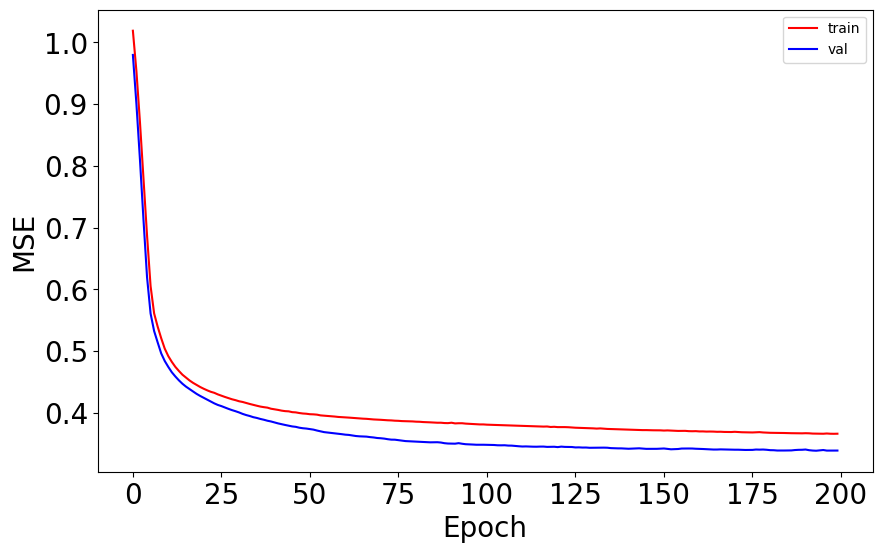

In [39]:
# Graficar el mse
model_history = model_search.fit(X_train,y_train,
                    epochs=epochs,
                    batch_size=200,
                    validation_data=(X_test,y_test))


fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_history.history['mse']), 'r', label='train')
ax.plot(np.sqrt(model_history.history['val_mse']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'MSE', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

### Comparación de modelos

In [40]:
data_compar_cross = {'Modelo': ['LR', 'Ridge', 'RF','Tree', ' SVR', 'NN'], 'MSE': [mse_lr, mse_ridge, mse_rf, mse_tree,mse_svr, mse_nn],
                    'MAE':[mae_lr, mae_ridge, mae_rf, mae_tree,mae_svr, mae_nn],
                    'R2':[r2_lr, r2_ridge, r2_rf, r2_tree,r2_svr, r2_nn]} 
data_compar_cross = pd.DataFrame(data_compar_cross)
data_compar_cross

,Modelo,MSE,MAE,R2
0,LR,0.163589,0.311901,0.836411
1,Ridge,0.163572,0.312042,0.836428
2,RF,0.085517,0.208829,0.914483
3,Tree,0.108104,0.223100,0.891896
4,SVR,0.118553,0.257272,0.881447
5,NN,0.126130,0.254586,0.873870


In [41]:
#crear nuevos datos
X_new  = pd.DataFrame([[27, 0, 30, 5999, 7000]], columns=['age', 'gender', 'miles', 'debt', 'income'])
X_new

,age,gender,miles,debt,income
0,27,0,30,5999,7000


In [42]:
# Make new predictions

ynew = new_model_RF.predict(X_new)



C:\Users\HP 250 G8\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [43]:
ynew

array([1.89150135])